In [2]:
import sys  
sys.path.insert(0, 'C:\\Users\\espebh\\Documents\\Thesis\\code_ver2')
import os
import pickle
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
import numpy as np
from scipy.stats import norm
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from numpy import random


In [3]:
dict_with_all_dbs_path = 'C:\\Users\\espebh\\Documents\\Thesis\\data\\frequency_dicts\\accumulated_data'
dict_with_all_dbs_file = open(os.path.join(dict_with_all_dbs_path, 'dict_with_all_dbs' + '.pkl'), 'rb')
dict_with_all_dbs = pickle.load(dict_with_all_dbs_file)
dict_with_all_dbs_file.close()

In [4]:

exp_dat = { '280922_t1': [14.0292, 36.600385, 90.030031, 300], 
            '051022_t1': [15.5924, 39.933990, 94.223844, 333],
            '280922_t2': [14.0156, 40.273676, 91.225978, 301], 
            '051022_t2': [15.5679, 43.603615, 90.923769, 344],
            '280922_t3': [13.9932, 17.670506, 76.095653, 311], 
            '051022_t3': [15.5649, 38.462245, 86.869107, 319],
            '290922_t4': [12.2851, 45.803954, 90.870657, 363],
            '061022_t4': [13.4351, 38.865835, 88.609558, 365],
            '290922_t5': [12.3212, 38.056640, 90.431858, 371],
            '061022_t5': [13.4442, 38.908660, 88.658724, 334],
            '290922_t6': [12.3295, 34.190574, 88.977146, 335],
            '061022_t6': [13.4536, 38.581455, 89.823750, 329],
            '280922_t7': [15.8902, 44.868576, 90.211965, 218],
            '051022_t7': [17.7105, 48.610588, 88.855440, 215],
            '280922_t8': [15.9239, 42.851896, 87.953265, 204],
            '051022_t8': [17.7525, 47.286791, 88.154413, 231],
            '280922_t9': [15.8689, 44.738884, 93.572209, 213],
            '051022_t9': [17.7342, 48.750417, 94.023570, 213]}


0.058822220815679706


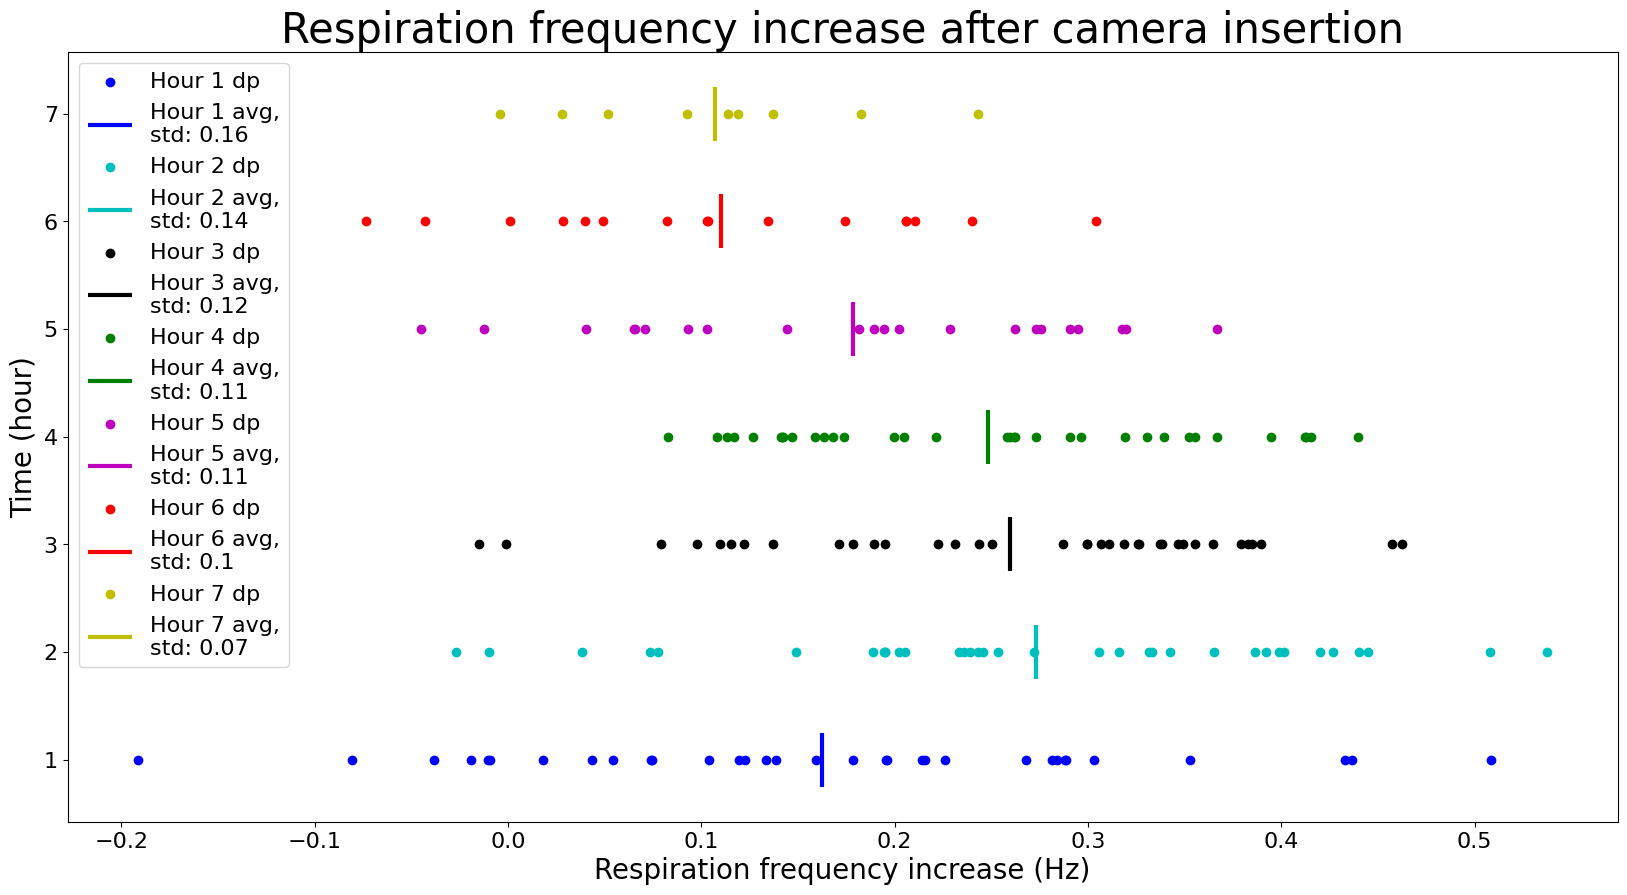

In [57]:
# Plot respiration increase after camera insertion seperated into hours.

import matplotlib
import math

fig, ax = plt.subplots(1,1, figsize=(20, 10))
nhours = 8
do = []
temp = []
vent = []
dist_inc_cold = []
dist_inc_med = []
dist_inc_hot = []
all_avg_dev = []
hourly_resp_inc = dict([(x, []) for x in range(1, nhours)])

for db_name in dict_with_all_dbs.keys():
    for h in range(1,nhours):
        curr_resp_inc = dict_with_all_dbs[db_name]['handling_frequency_resp_increase'][h]
        if type(curr_resp_inc) == list:
            continue
        if not math.isnan(dict_with_all_dbs[db_name]['handling_frequency_resp_increase'][h]):
            hourly_resp_inc[h].append(dict_with_all_dbs[db_name]['handling_frequency_resp_increase'][h])
    
leg = []
for h in range(1,nhours):
    if h == 1:
        c = 'b'
    if h == 2:
        c = 'c'
    if h == 3:
        c = 'k'
    if h == 4:
        c = 'g'
    if h == 5:
        c = 'm'
    if h == 6:
        c = 'r'
    if h == 7:
        c = 'y'
    ax.scatter(hourly_resp_inc[h], np.ones(len(hourly_resp_inc[h]))*h, color = c)
    ax.vlines(np.average(hourly_resp_inc[h]), ymin = h-0.25, ymax = h+0.25, color = c, linewidth = 3)

    #plt.hist(hourly_resp_inc[h], alpha = 0.5, bins=15, color = c)
    #plt.axvline(np.average(hourly_resp_inc[h]), color = c)
    leg.append('Hour ' + str(h) + ' dp')
    leg.append('Hour ' + str(h) + ' avg,\nstd: ' + str(np.round(np.std(hourly_resp_inc[h]), 2)))
ax.legend(leg, ncols = 1, fontsize = 16)
ax.set_xlabel('Respiration frequency increase (Hz)', fontsize = 20)
ax.set_ylabel('Time (hour)', fontsize = 20)
ax.set_title('Respiration frequency increase after camera insertion', fontsize = 30)
ax.tick_params(labelsize=16)

t, p =  ttest_ind(hourly_resp_inc[7], hourly_resp_inc[5], equal_var=False, alternative='two-sided')
print(p)


c:\Users\espebh\Documents\Thesis\code_ver2\dat_gen_th\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\espebh\Documents\Thesis\code_ver2\dat_gen_th\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\espebh\AppData\Local\Temp\ipykernel_8184\3205234616.py:43: RuntimeWarning: Mean of empty slice
  avgs = np.nanmean(plot_array, axis = 1)


Text(0, 0.5, 'Temperature (Celsius)')

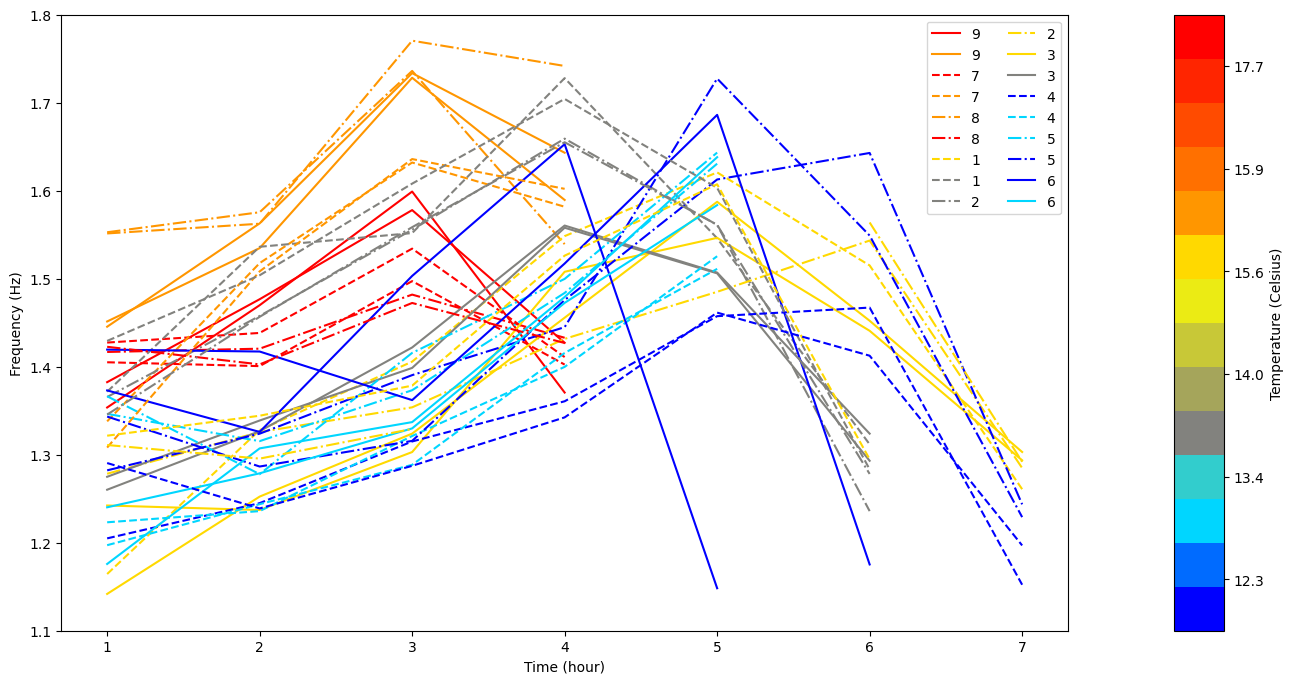

In [6]:
# Plot all hourly frequnecy trajectories together

def norm_temp(temp, low = 12.3, high = 17.7):
    return (temp - low)*1/(high-low)

def inv_norm_temp(norm, low = 12.3, high = 17.7):
    return low + norm*(high-low)


leg = []
shapes = ['solid', 'dashed', 'dashdot']
colors_range = []

colors_acc = [  (12.3, 'blue'), 
                (13.4, 'cyan'), 
                (14.0, 'gray'), 
                (15.6, 'yellow'), 
                (15.9, 'orange'), 
                (17.7, 'red')]

colors_range = [((colors_acc[i][0]*0.1 + colors_acc[i+1][0]*0.9), colors_acc[i+1][1]) for i in range(0,len(colors_acc)-1)]
colors_range.insert(0, (colors_acc[0][0], colors_acc[0][1]))
colors_range[-1] = ((colors_acc[-1][0], colors_acc[-1][1]))
colors_range_norm = [(norm_temp(tup[0]), tup[1]) for tup in colors_range]

cmap=LinearSegmentedColormap.from_list('brmap', colors_range_norm, N=14)

fig, ax = plt.subplots(1,2,gridspec_kw={'width_ratios': [20, 1]}, figsize=(15, 8))
tanktemp = []
peak_vent_to_DO = []

for db_name in dict_with_all_dbs.keys():
    freq_dict_per_hour = dict_with_all_dbs[db_name]['hourly_freq_evol']
    nfish = 7
    nhours = 7
    plot_array = np.zeros([nhours, nfish])
    avg = []

    for hour, i in zip(freq_dict_per_hour.keys(), range(len(freq_dict_per_hour.keys()))):
        for fish_name, j in zip(freq_dict_per_hour[hour], range(len(freq_dict_per_hour[hour]))):
            plot_array[i][j] = np.median(freq_dict_per_hour[hour][fish_name])
    
    avgs = np.nanmean(plot_array, axis = 1)
    tank = int(db_name.split('_')[3][1])
    date = db_name.split('_')[2]
    exp_key = date + '_t' + str(tank)
    curr_temp = exp_dat[exp_key][0]
    peak_vent_to_DO.append([dict_with_all_dbs[db_name]['peak_full_freq_evol'], dict_with_all_dbs[db_name]['peak_hourly_freq_evol'], exp_dat[date + '_t' + str(tank)][1], exp_dat[date + '_t' + str(tank)][0]])
    if str(cmap(norm_temp(curr_temp))) + shapes[tank % 3] not in tanktemp:
        leg.append(db_name.split('_')[3][1])
        tanktemp.append(str(cmap(norm_temp(curr_temp))) + shapes[tank % 3])
        ax[0].plot(np.linspace(1, nhours, num = nhours), avgs, color = cmap(norm_temp(curr_temp)), linestyle = shapes[tank % 3])
    else:
        ax[0].plot(np.linspace(1, nhours, num = nhours), avgs, color = cmap(norm_temp(curr_temp)), linestyle = shapes[tank % 3], label='_nolegend_')
    ax[0].legend(leg, ncol = 2)
ax[0].set_ylim(1.1,1.8)

matplotlib.colorbar.ColorbarBase(ax[1], cmap=cmap,       
                                ticks=np.linspace(1/(2*len(colors_acc)), (2*len(colors_acc)-1)/(2*len(colors_acc)), (len(colors_acc))),
                                spacing='proportional',
                                orientation='vertical')

added_date = ['2909', '0610', '2809', '0510', '2809', '0510']
ax[1].set_yticklabels([str(colors_acc[i][0])for i in range(len(colors_acc))])

ax[0].set_xlabel('Time (hour)')
ax[0].set_ylabel('Frequency (Hz)')
ax[1].set_ylabel('Temperature (Celsius)')


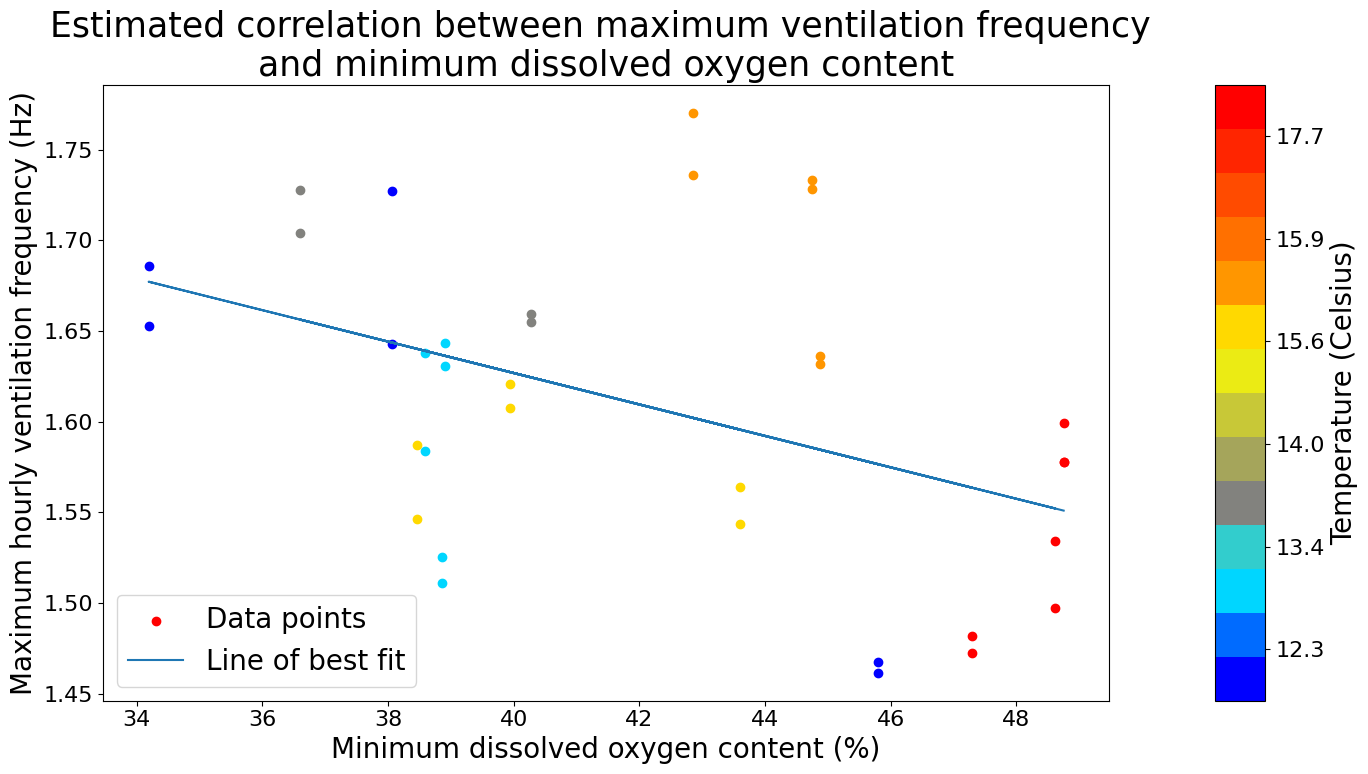

In [7]:
# Plot the correlation between maximum ventilation frequnecy and minimum dissolved oxygen content.

fig, ax = plt.subplots(1,2,gridspec_kw={'width_ratios': [20, 1]}, figsize=(15, 8))
peak_vent_to_DO = [l for l in peak_vent_to_DO if l[2] > 20] # Remove the erroneous tank 3 data

for i in range(len(peak_vent_to_DO)):
    if i == 0:
        ax[0].scatter(np.array(peak_vent_to_DO)[i,2], np.array(peak_vent_to_DO)[i,1], color = cmap(norm_temp(np.array(peak_vent_to_DO)[i,3])))
    ax[0].scatter(np.array(peak_vent_to_DO)[i,2], np.array(peak_vent_to_DO)[i,1], color = cmap(norm_temp(np.array(peak_vent_to_DO)[i,3])), label='_nolegend_')

x = np.array(peak_vent_to_DO)[:,2]
y = np.array(peak_vent_to_DO)[:,1]
line_params = np.polyfit(x,y,1)
y_line = x*line_params[0] + line_params[1]
ax[0].plot(x, y_line)


matplotlib.colorbar.ColorbarBase(ax[1], cmap=cmap,       
                                ticks=np.linspace(1/(2*len(colors_acc)), (2*len(colors_acc)-1)/(2*len(colors_acc)), (len(colors_acc))),
                                spacing='proportional',
                                orientation='vertical')
ax[1].set_yticklabels([str(colors_acc[i][0])for i in range(len(colors_acc))])
ax[0].set_xlabel('Minimum dissolved oxygen content (%)', fontsize = 20)
ax[0].set_ylabel('Maximum hourly ventilation frequency (Hz)', fontsize = 20)
ax[1].set_ylabel('Temperature (Celsius)', fontsize = 20)
ax[0].legend(['Data points', 'Line of best fit'], fontsize = 20)
ax[0].set_title('Estimated correlation between maximum ventilation frequency \nand minimum dissolved oxygen content', fontsize = 25)
ax[0].tick_params(labelsize=16)
ax[1].tick_params(labelsize=16)



In [8]:
def find_oxy_folder(t):
    if t == '1':
        return '1-7450-393587'
    if t == '2':
        return '2-7450-380354'
    if t == '3':
        return '3-7450-386341'
    if t == '4':
        return '4-7450-348186'
    if t == '5':
        return '5-7450-386790'
    if t == '6':
        return '6-7450-536694'
    if t == '7':
        return '7-7450-334350'
    if t == '8':
        return '8-7450-510135'
    if t == '9':
        return '9-7450-531097'


def get_low_vent(freq_dict_per_hour):
    nfish = 7
    nhours = 7
    plot_array = np.zeros([nhours, nfish])
    avg = []

    for hour, i in zip(freq_dict_per_hour.keys(), range(len(freq_dict_per_hour.keys()))):
        for fish_name, j in zip(freq_dict_per_hour[hour], range(len(freq_dict_per_hour[hour]))):
            plot_array[i][j] = np.median(freq_dict_per_hour[hour][fish_name])
    avgs = np.nanmean(plot_array, axis = 1)
    return avgs[0]


C:\Users\espebh\AppData\Local\Temp\ipykernel_8184\616628909.py:43: DtypeWarning: Columns (0,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\\Users\\espebh\\Documents\\Project\\to_report\\oxygen data\\Data_O2_T_miniDOT_BIORELEVANS\\Data_O2_T_miniDOT_BIORELEVANS\\' + find_oxy_folder(str(tank))+ r'\\Cat.txt', on_bad_lines='skip', skiprows=[0, 1, 2, 3, 4, 5, 6], skipinitialspace = True)
c:\Users\espebh\Documents\Thesis\code_ver2\dat_gen_th\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\espebh\Documents\Thesis\code_ver2\dat_gen_th\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\espebh\AppData\Local\Temp\ipykernel_8184\616628909.py:43: DtypeWarning: Columns (0,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_m

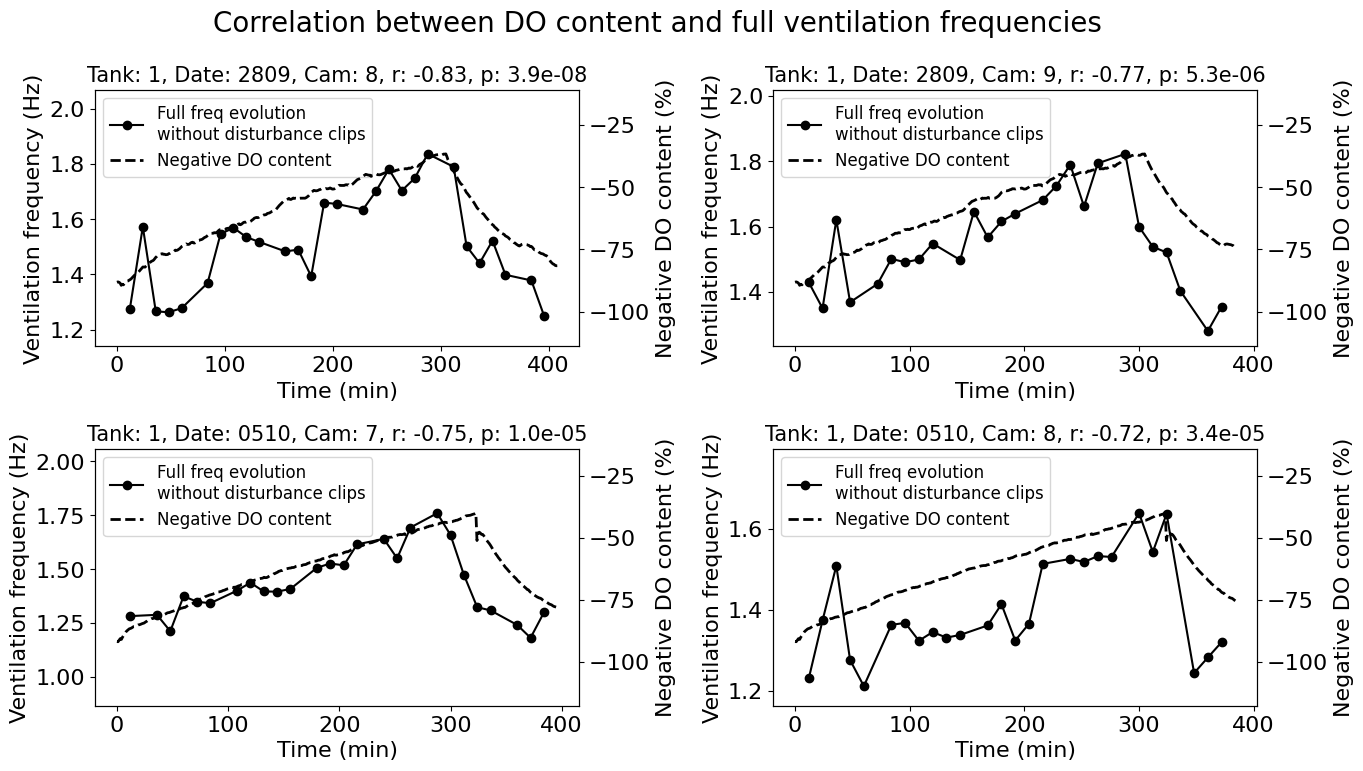

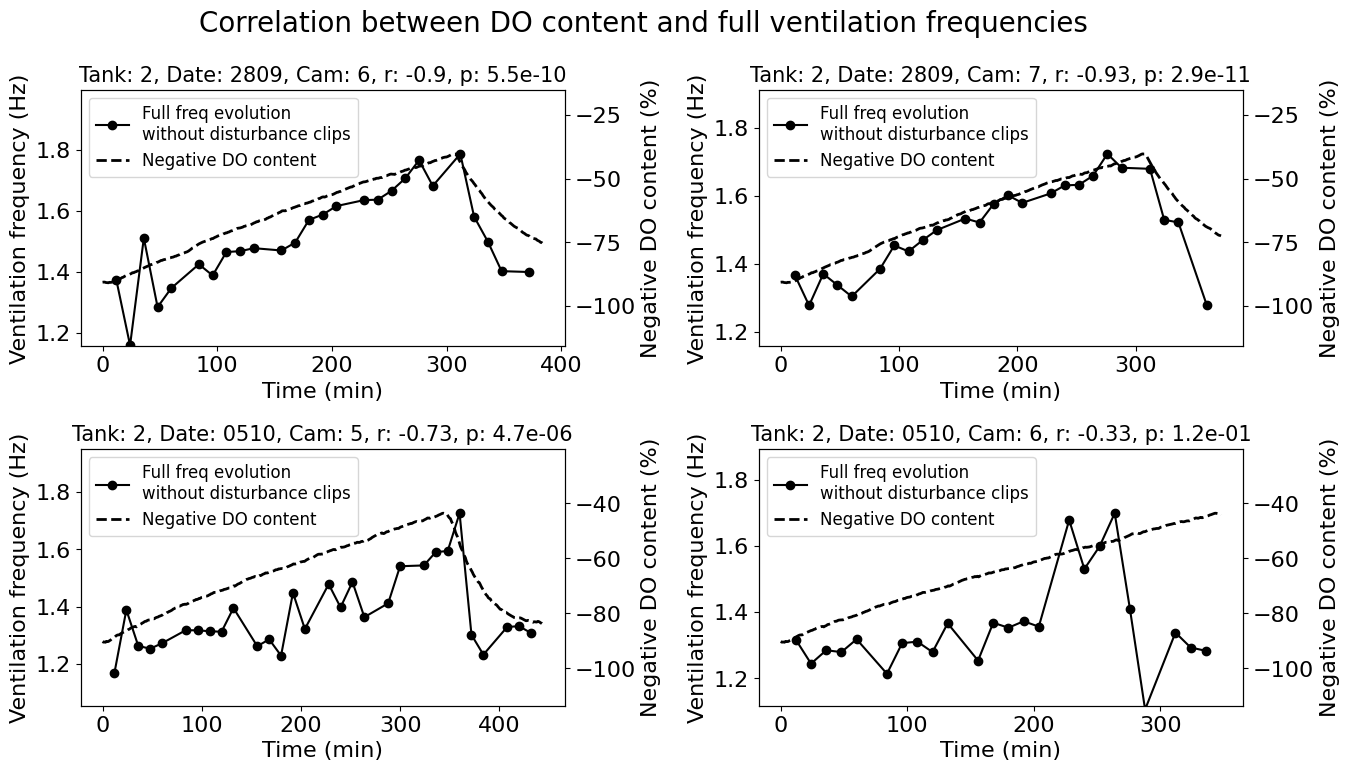

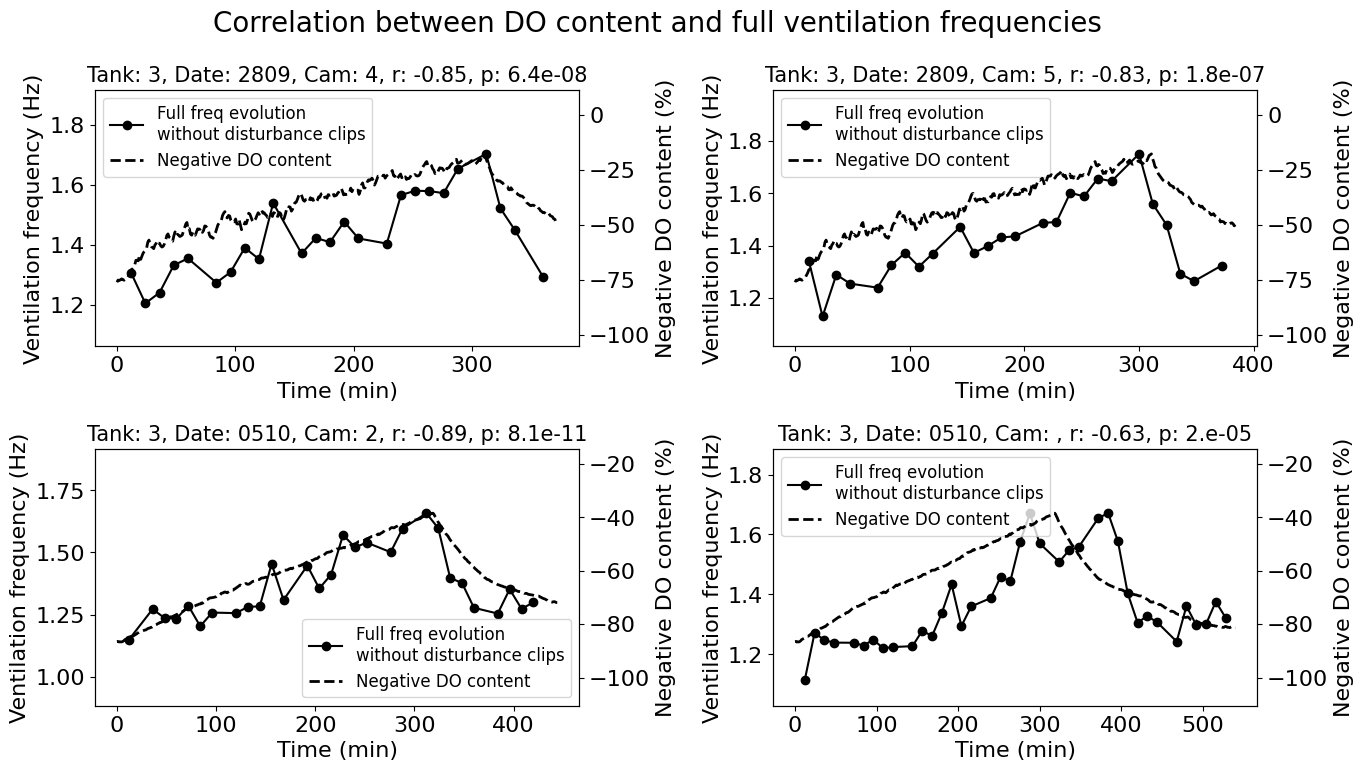

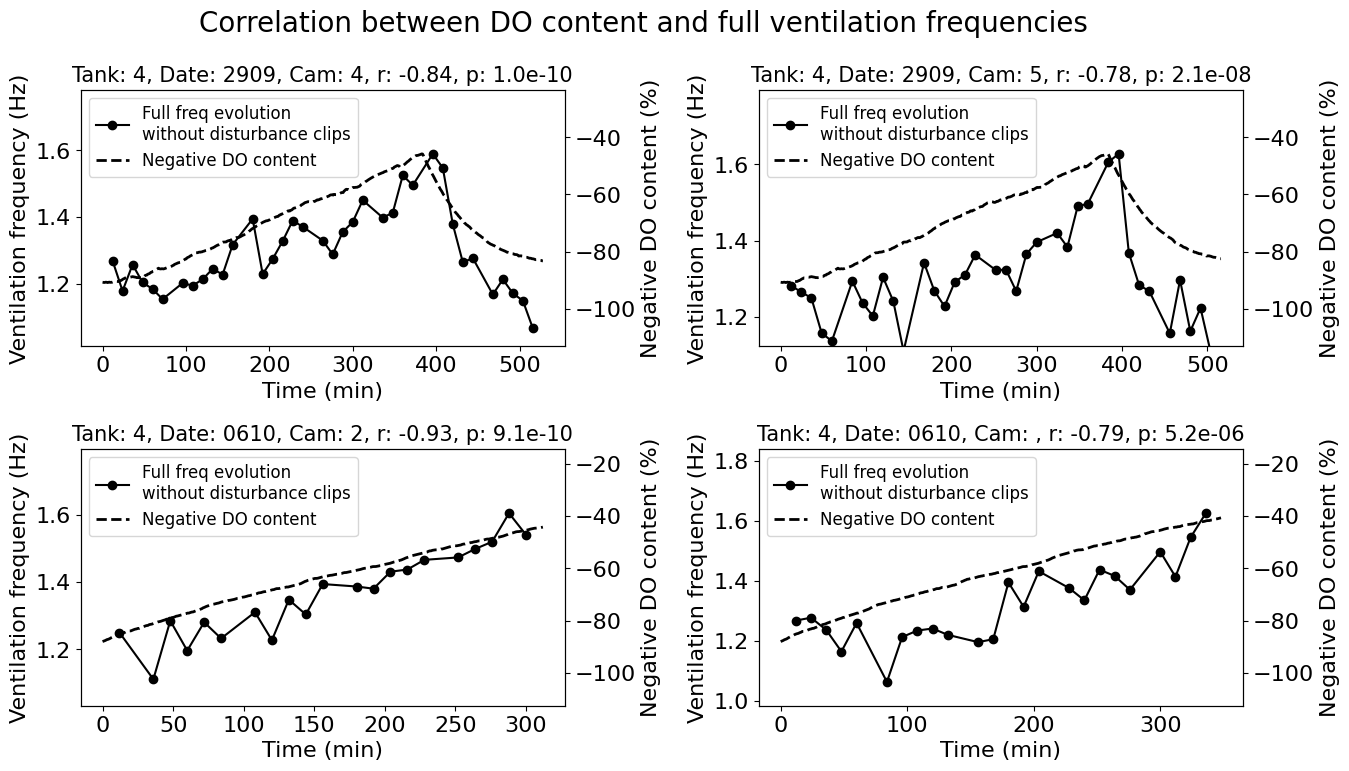

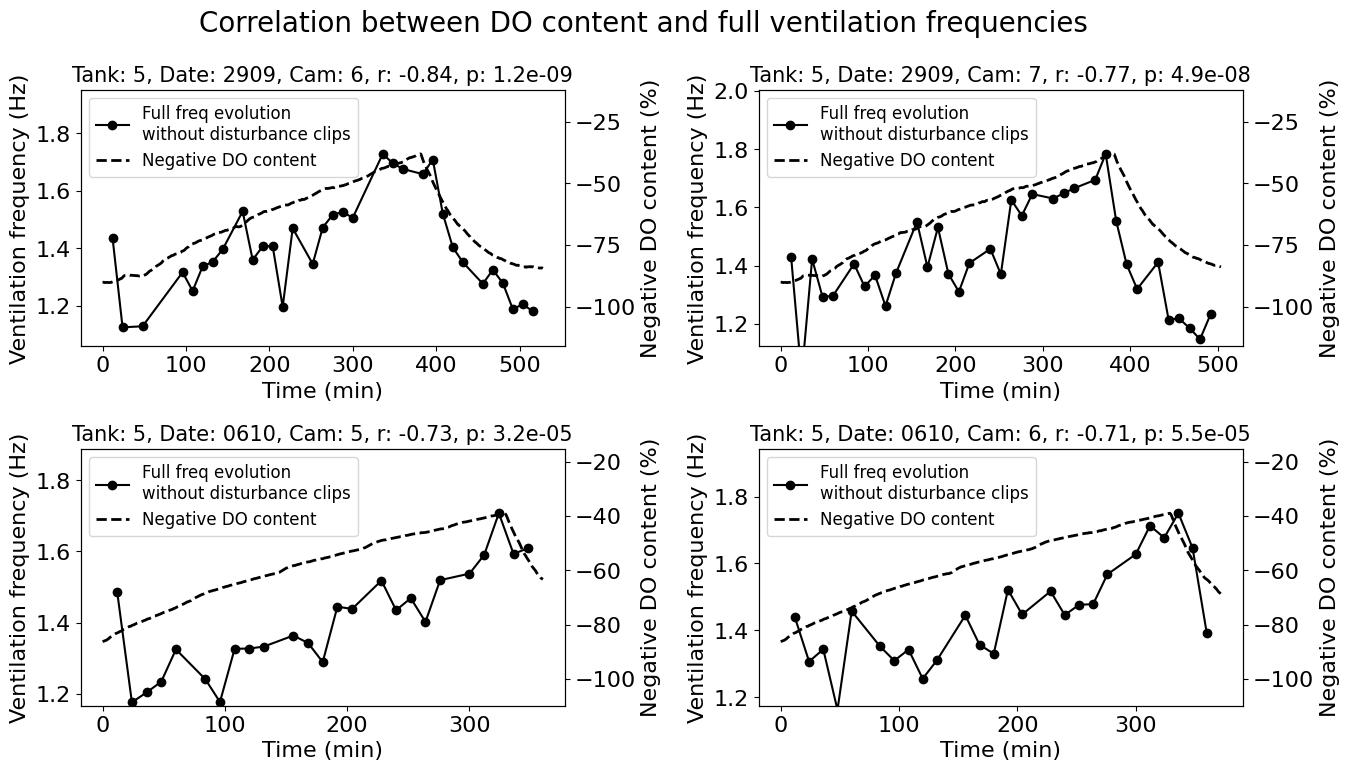

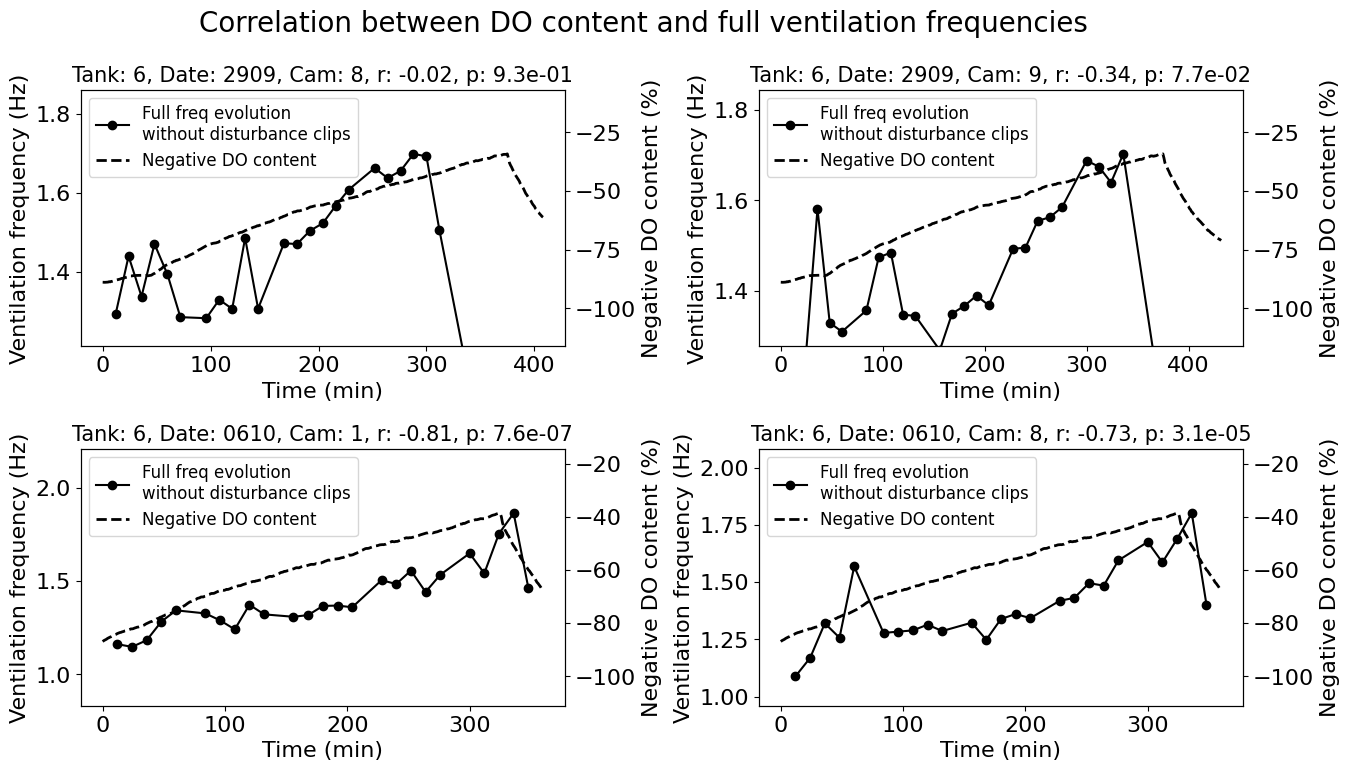

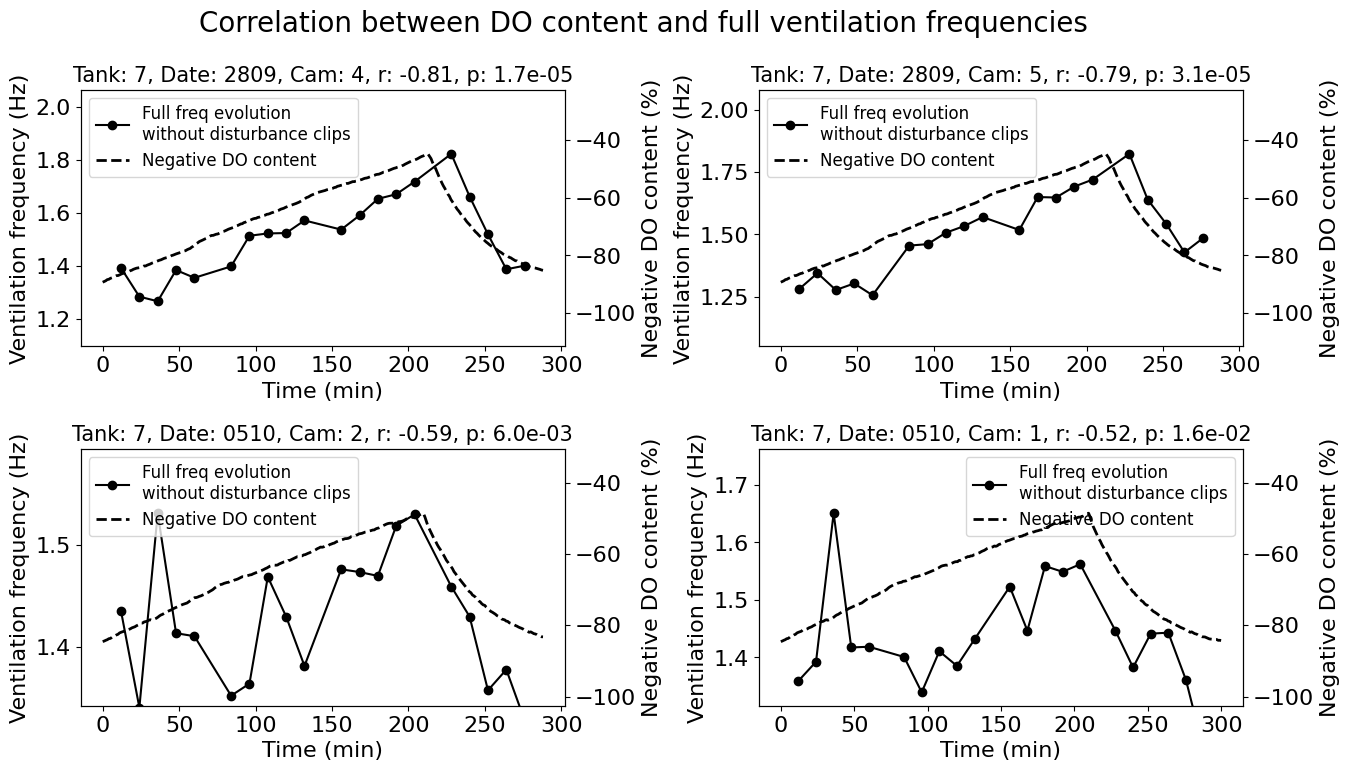

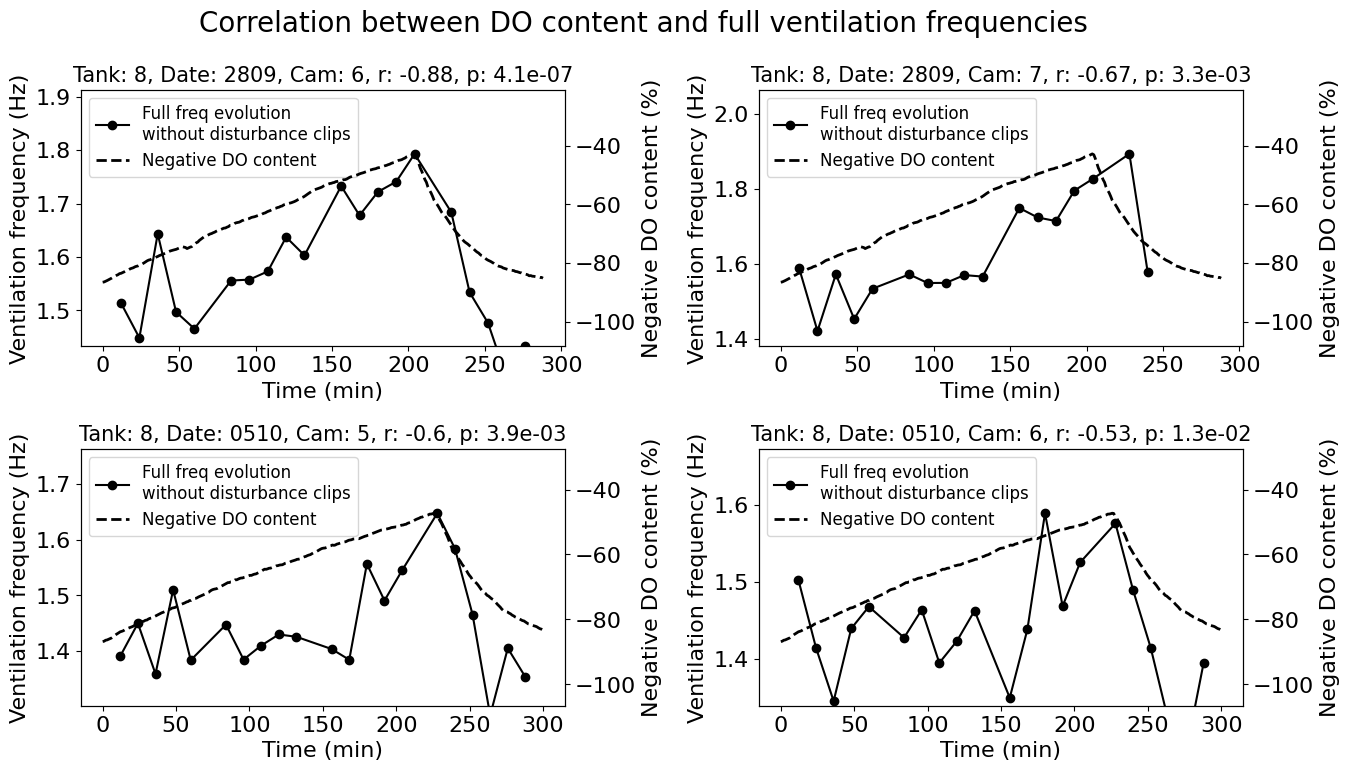

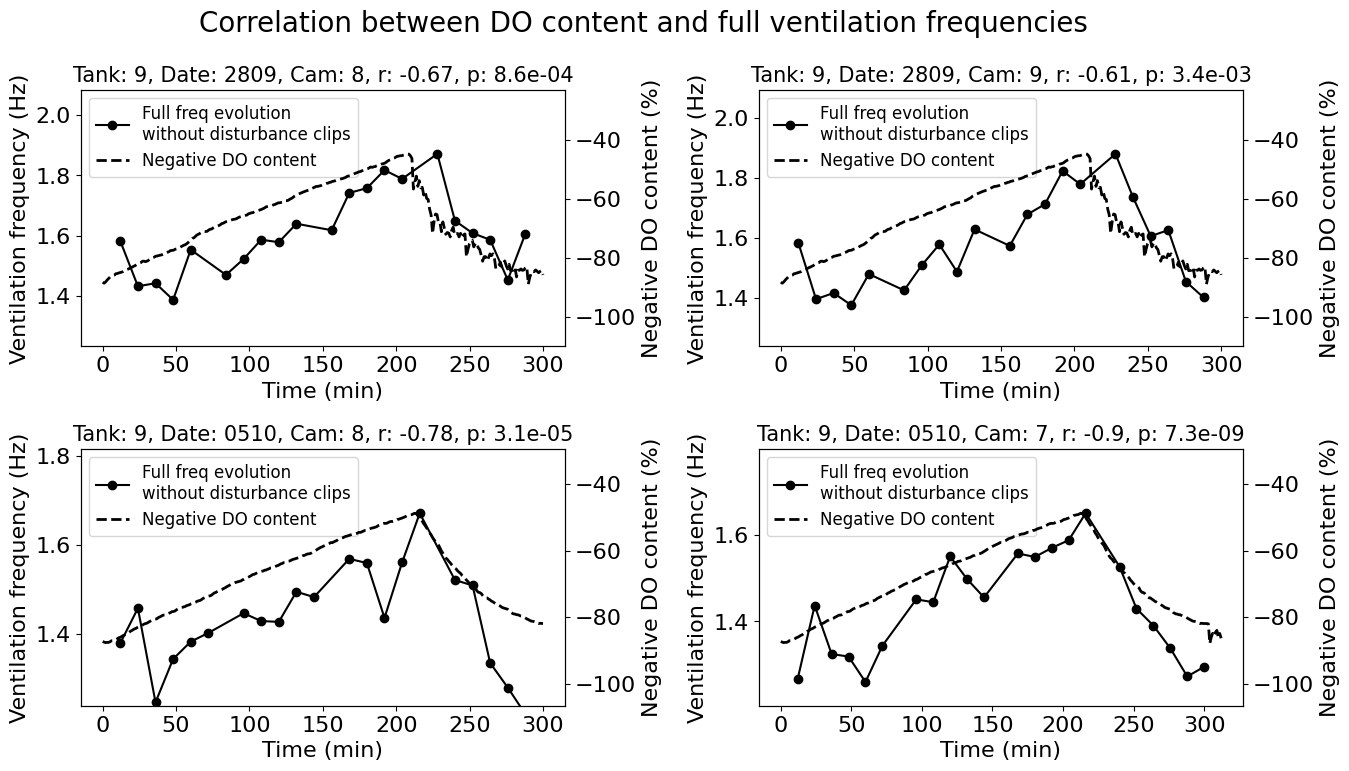

In [36]:
# Overlay with oxygen content
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
#w_date = '280922'
#w_tank = 1

oxy_offset = {  't1_db1': 800,
                't1_db2': 730,
                't2_db1': 800,
                't2_db2': 730,
                't3_db1': 800,
                't3_db2': 730,
                't4_db1': 400,
                't4_db2': 430,
                't5_db1': 400,
                't5_db2': 430,
                't6_db1': 400,
                't6_db2': 430,
                't7_db1': 530,
                't7_db2': 430,
                't8_db1': 530,
                't8_db2': 430,
                't9_db1': 530,
                't9_db2': 430,
}

tank_ordered_dict_keys = ['_'.join(l) for l in sorted([l.split('_') for l in list(dict_with_all_dbs.keys())], key=lambda dictkey:dictkey[3][1])]
pl = []
for i in range(1, 10):
    pl.append(plt.subplots(2,2, figsize = (15,8)))

already_plotted =  dict([(x,0) for x in (list(oxy_offset.keys()))])

for db_name in tank_ordered_dict_keys:
    tank = int(db_name.split('_')[3][1])
    date = db_name.split('_')[2]
    if len(db_name.split('_')[4]) >=2:
        cam = db_name.split('_')[4][1]
    else:
        cam = ''
    df = pd.read_csv(r'C:\\Users\\espebh\\Documents\\Project\\to_report\\oxygen data\\Data_O2_T_miniDOT_BIORELEVANS\\Data_O2_T_miniDOT_BIORELEVANS\\' + find_oxy_folder(str(tank))+ r'\\Cat.txt', on_bad_lines='skip', skiprows=[0, 1, 2, 3, 4, 5, 6], skipinitialspace = True)
    if date.startswith('0'):
        start = oxy_offset['t' + str(tank) + '_' + 'db2']
    elif date.startswith('2'):
        start = oxy_offset['t' + str(tank) + '_' + 'db1']
    dates = df['UTC_Date_&_Time'].to_numpy()[1:]
    day = date[0:2]
    month = date[2:4]
    mask = [1 if string.split('-')[2].startswith(day) and string.split('-')[1].startswith(month) else 0 for string in dates]
    mask = np.insert(mask, 0, 0)
    day_data = df.to_numpy()[np.where(mask)]
    do = [float(do) for do in day_data[:,6]]
    do_neg = [-float(do) for do in day_data[:,6]]
    low_vent = get_low_vent(freq_dict_per_hour = dict_with_all_dbs[db_name]['hourly_freq_evol'])
    high_vent = dict_with_all_dbs[db_name]['peak_full_freq_evol']
    low_do = do_neg[start]
    high_do = max(do_neg)
    # scale = (high_do-low_do)/(high_vent-low_vent)
    # offset = low_vent-low_do
    # do_corr = [(d + offset)/scale + low_vent for d in do]

    n_clips = len(dict_with_all_dbs[db_name]['full_freq_evol_avg'])
    time = np.linspace(0, n_clips, num = 12*n_clips)
    dist = dict_with_all_dbs[db_name]['dist']
    pears_samples = np.array([i for i in range(n_clips) if i not in list(dist.values())])
    if np.sum(np.isnan(np.array(dict_with_all_dbs[db_name]['full_freq_evol_avg'])[pears_samples])) > 0:
        pears_samples = pears_samples[~np.isnan(np.array(dict_with_all_dbs[db_name]['full_freq_evol_avg'])[pears_samples])]
    pears_samples = pears_samples[~np.isnan(pears_samples)].astype(int)
    do_samples_for_pers = [do[int(start + s*12)] for s in pears_samples]
    vent_samples_for_pers = np.array(dict_with_all_dbs[db_name]['full_freq_evol_avg'])[pears_samples]
    stat, p = scipy.stats.pearsonr(do_samples_for_pers, vent_samples_for_pers)

    no_dist_full_freq = vent_samples_for_pers
    # for i in range(n_clips):
    #     if i == 0:
    #         no_dist_full_freq.append(dict_with_all_dbs[db_name]['full_freq_evol_avg'][1])
    #     elif i not in list(dist.values()):
    #         no_dist_full_freq.append(dict_with_all_dbs[db_name]['full_freq_evol_avg'][i])      
    #     else:  
    #         no_dist_full_freq.append((dict_with_all_dbs[db_name]['full_freq_evol_avg'][i-1] + dict_with_all_dbs[db_name]['full_freq_evol_avg'][i+1])/2)

    if date[0] == '2':
        if already_plotted['t' + str(tank) + '_' + 'db1'] == 0:
            already_plotted['t' + str(tank) + '_' + 'db1'] = 1
            col = 0
        else:
            col = 1

        twin = pl[tank-1][1][0][col].twinx()
        #plt0 = pl[tank-1][1][0][col].plot(range(0,12*n_clips,12), dict_with_all_dbs[db_name]['full_freq_evol_avg'], color = color, label = 'Full frequency evolution')
        plt0 = pl[tank-1][1][0][col].plot(np.array(range(0,12*n_clips,12))[pears_samples], no_dist_full_freq, '-o', color = 'k', label = 'Full freq evolution \nwithout disturbance clips')
        plt1 = twin.plot(time*12, do_neg[start:start+len(time)], color = 'k', label = 'Negative DO content', linestyle = '--', linewidth = 2)
        plts = plt0 + plt1
        pl[tank-1][1][0][col].legend(plts, [lab.get_label() for lab in plts], fontsize = 12)

        ylim_do = [do_neg[start], high_do]
        ylim_vent = [low_vent, high_vent]
        perc_extra = 50
        ylim_do_add = (ylim_do[1] - ylim_do[0])*perc_extra/100
        ylim_vent_add = (ylim_vent[1] - ylim_vent[0])*perc_extra/100
        twin.set_ylabel('Negative DO content (%)', fontsize = 16)
        twin.set_ylim(ylim_do[0] - ylim_do_add, ylim_do[1] + ylim_do_add)

        pl[tank-1][1][0][col].set_ylim(ylim_vent[0] - ylim_vent_add, ylim_vent[1] + ylim_vent_add)
        pl[tank-1][0].suptitle('Correlation between DO content and full ventilation frequencies', fontsize = 20)
        pl[tank-1][1][0][col].set_xlabel('Time (min)', fontsize = 16)
        pl[tank-1][1][0][col].set_ylabel('Ventilation frequency (Hz)', fontsize = 16)
        #pl[tank-1][1][0][col].set_title('Tank: ' + str(tank) + ', Date: ' + date+ ', Cam: ' + cam + ', p: ' + str(np.format_float_scientific(stat, precision = 2)), fontsize = 16)
        pl[tank-1][1][0][col].set_title('Tank: ' + str(tank) + ', Date: ' + date[0:4] + ', Cam: ' + cam + ', r: ' + str(np.round(stat, 2)) + ', p: ' + str(np.format_float_scientific(p, precision = 1)), fontsize = 15)
        pl[tank-1][1][0][col].tick_params(labelsize=16)
        twin.tick_params(labelsize=16)
    if date[0] == '0':
        if already_plotted['t' + str(tank) + '_' + 'db2'] == 0:
            already_plotted['t' + str(tank) + '_' + 'db2'] = 1
            col = 0
        else:
            col = 1
        twin = pl[tank-1][1][1][col].twinx()
        # plt0 = pl[tank-1][1][1][col].plot(range(0,12*n_clips,12), dict_with_all_dbs[db_name]['full_freq_evol_avg'], color = color, label = 'Full frequency evolution')
        plt0 = pl[tank-1][1][1][col].plot(np.array(range(0,12*n_clips,12))[pears_samples], no_dist_full_freq, '-o', color = 'k', label = 'Full freq evolution \nwithout disturbance clips')
        plt1 = twin.plot(time*12, do_neg[start:start+len(time)], color = 'k', label = 'Negative DO content', linestyle = '--', linewidth = 2)
        plts = plt0 + plt1
        pl[tank-1][1][1][col].legend(plts, [lab.get_label() for lab in plts], fontsize = 12)

        ylim_do = [do_neg[start], high_do]
        ylim_vent = [low_vent, high_vent]
        perc_extra = 50
        ylim_do_add = (ylim_do[1] - ylim_do[0])*perc_extra/100
        ylim_vent_add = (ylim_vent[1] - ylim_vent[0])*perc_extra/100
        twin.set_ylabel('Negative DO content (%)', fontsize = 16)
        twin.set_ylim(ylim_do[0] - ylim_do_add, ylim_do[1] + ylim_do_add)

        pl[tank-1][1][1][col].set_ylim(ylim_vent[0] - ylim_vent_add, ylim_vent[1] + ylim_vent_add)
        pl[tank-1][1][1][col].set_xlabel('Time (min)', fontsize = 16)
        pl[tank-1][1][1][col].set_ylabel('Ventilation frequency (Hz)', fontsize = 16)
        pl[tank-1][1][1][col].set_title('Tank: ' + str(tank) + ', Date: ' + date[0:4] + ', Cam: ' + cam + ', r: ' + str(np.round(stat, 2)) + ', p: ' + str(np.format_float_scientific(p, precision = 1)), fontsize = 15)
        pl[tank-1][1][1][col].tick_params(labelsize=16)
        twin.tick_params(labelsize=16)
for i in range(len(pl)):
    pl[i][0].subplots_adjust(hspace=0.4, wspace=0.4)
    pl[i][0].savefig(os.path.join('C:\\Users\\espebh\\Documents\\Thesis\\Report\\do_vs_vent', 'DO_to_vent_' + 't' + str(i+1) + '.png'))



C:\Users\espebh\AppData\Local\Temp\ipykernel_18928\2891196904.py:44: RuntimeWarning: Mean of empty slice
  avgs = np.nanmean(plot_array, axis = 1)


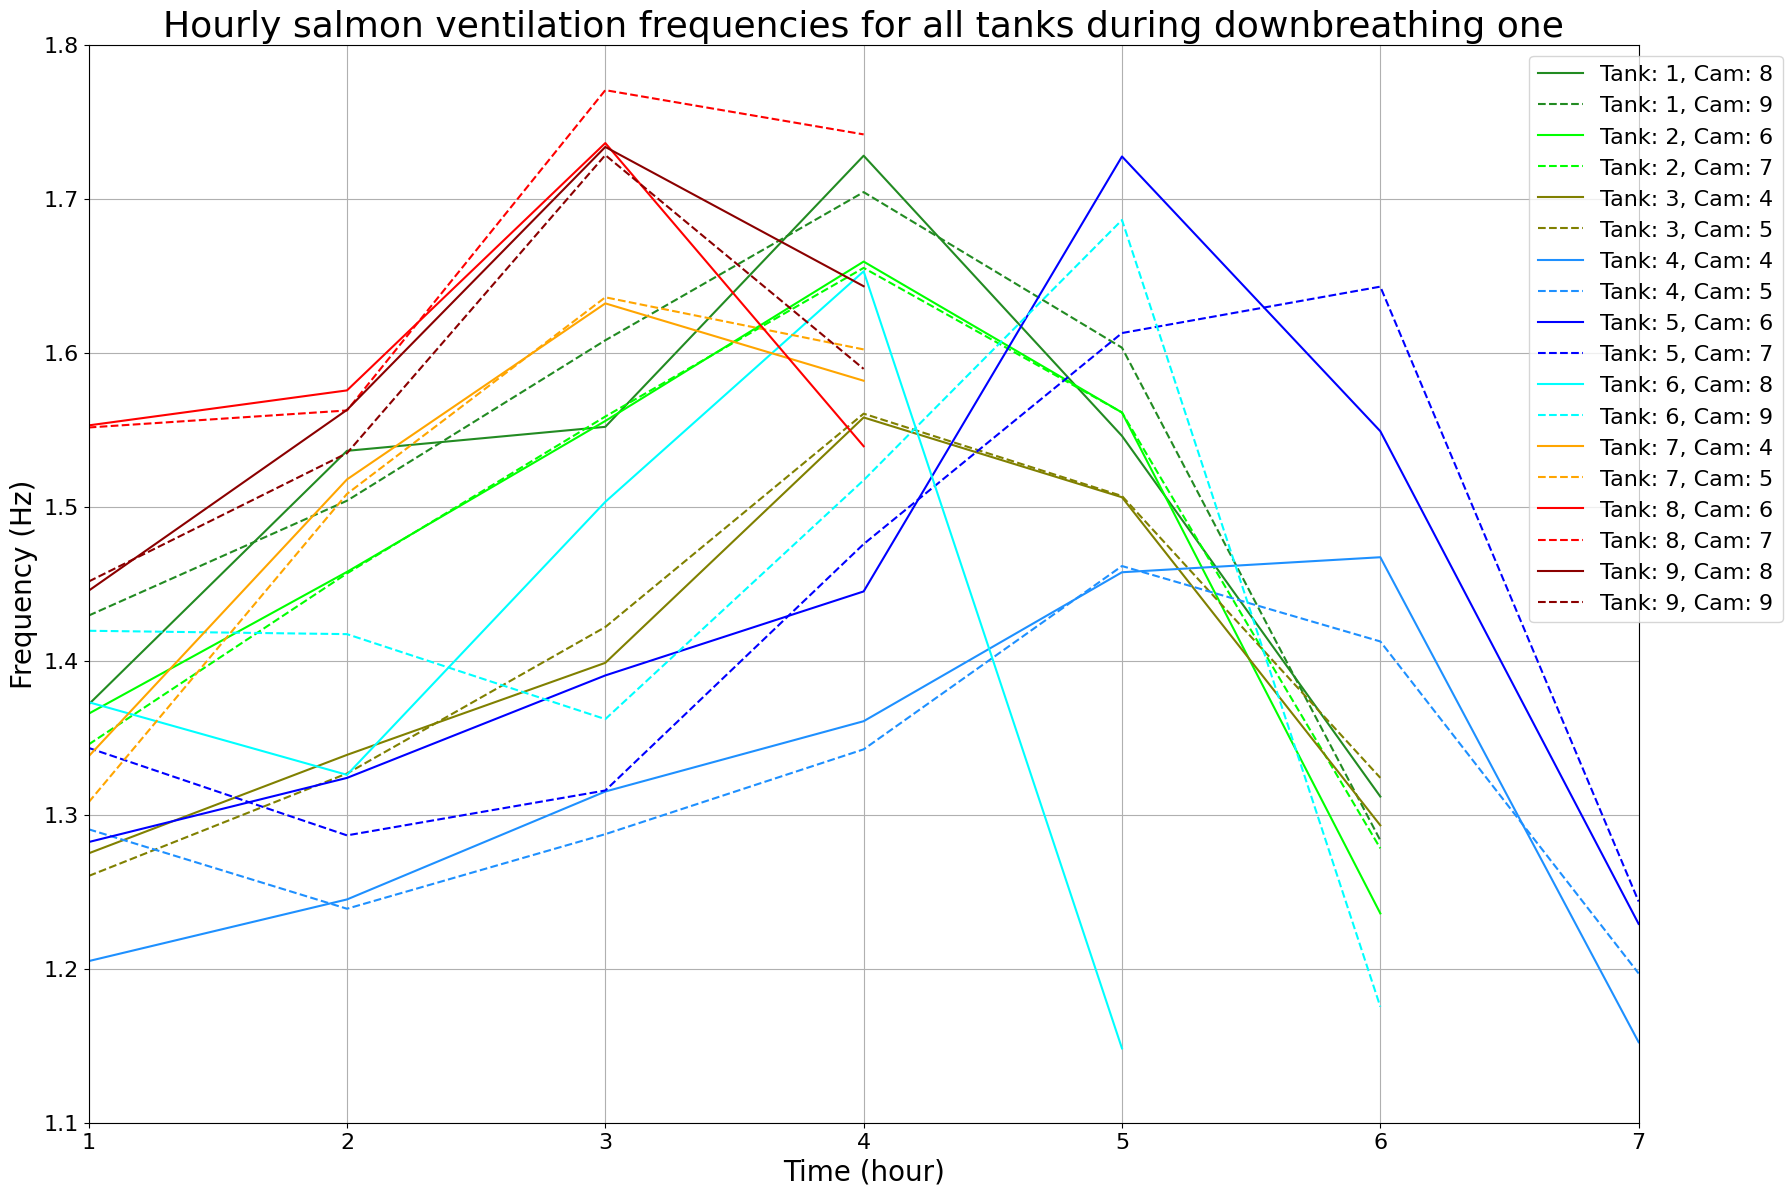

In [ ]:
# Plot downbreathing data from downbreathing one
def norm_temp(temp, low = 12.3, high = 17.7):
    return (temp - low)*1/(high-low)

def inv_norm_temp(norm, low = 12.3, high = 17.7):
    return low + norm*(high-low)

legsept = []
shapes = ['solid', 'dashed', 'dashdot']
colors_range = []

colors= {   '4': 'dodgerblue',
            '5': 'blue',
            '6': 'cyan',
            '1': 'forestgreen',
            '2': 'lime',
            '3': 'olive',
            '7': 'orange',
            '8': 'red',
            '9': 'darkred'}
tank_in_legsept = dict([(str(x), []) for x in range(1, 10)])

fig, ax = plt.subplots(1,1, figsize=(20, 14))
tanktemp = []
tank_ordered_dict_keys = ['_'.join(l) for l in sorted([l.split('_') for l in list(dict_with_all_dbs.keys())], key=lambda dictkey:dictkey[3][1])]
beg_vent = {12.3: [], 13.4: [], 14.0: [], 15.6: [], 15.9: [], 17.7: []}
max_vent_full = {12.3: [], 13.4: [], 14.0: [], 15.6: [], 15.9: [], 17.7: []}
max_vent_hourly = {12.3: [], 13.4: [], 14.0: [], 15.6: [], 15.9: [], 17.7: []}


for db_name in tank_ordered_dict_keys:
    freq_dict_per_hour = dict_with_all_dbs[db_name]['hourly_freq_evol']
    # Create avg trajectory
    nfish = 7
    nhours = 7
    plot_array = np.zeros([nhours, nfish])

    for hour, i in zip(freq_dict_per_hour.keys(), range(len(freq_dict_per_hour.keys()))):
        for fish_name, j in zip(freq_dict_per_hour[hour], range(len(freq_dict_per_hour[hour]))):
            plot_array[i][j] = np.median(freq_dict_per_hour[hour][fish_name])
    try:
        full_freq_evol_avg = [dict_with_all_dbs[db_name]['full_freq_evol_avg'][i] for i in range(len(dict_with_all_dbs[db_name]['full_freq_evol_avg'])) if i not in list(dict_with_all_dbs[db_name]['dist'].values())]

        avgs = np.nanmean(plot_array, axis = 1)
        tank = int(db_name.split('_')[3][1])
        date = db_name.split('_')[2]
        if len(db_name.split('_')[4]) >=2:
            cam = db_name.split('_')[4][1]
        else:
            cam = ''
        exp_key = date + '_t' + str(tank)
        curr_temp = exp_dat[exp_key][0]
        
        if date.startswith('2'):
            if curr_temp < 13.6:
                beg_vent[12.3].append(avgs[0])
                max_vent_full[12.3].append(dict_with_all_dbs[db_name]['peak_full_freq_evol'])
                max_vent_hourly[12.3].append(dict_with_all_dbs[db_name]['peak_hourly_freq_evol'])
            elif curr_temp < 15.7:
                beg_vent[14.0].append(avgs[0])
                max_vent_full[14.0].append(dict_with_all_dbs[db_name]['peak_full_freq_evol'])
                max_vent_hourly[14.0].append(dict_with_all_dbs[db_name]['peak_hourly_freq_evol'])
            else:
                beg_vent[15.9].append(avgs[0])
                max_vent_full[15.9].append(dict_with_all_dbs[db_name]['peak_full_freq_evol'])
                max_vent_hourly[15.9].append(dict_with_all_dbs[db_name]['peak_hourly_freq_evol'])

            if len(tank_in_legsept[str(tank)]) == 0:
                legsept.append('Tank: ' + str(tank) + ', Cam: ' + str(cam))
                ax.plot(np.linspace(1, nhours, num = nhours), avgs, color = colors[str(tank)], linestyle = '-')
                #ax.plot(full_freq_evol_avg, color = colors[str(tank)], linestyle = '-')
                tank_in_legsept[str(tank)].append(cam)
            else:
                legsept.append('Tank: ' + str(tank) + ', Cam: ' + str(cam))
                ax.plot(np.linspace(1, nhours, num = nhours), avgs, color = colors[str(tank)], linestyle = '--')
                #ax.plot(full_freq_evol_avg, color = colors[str(tank)], linestyle = '--')
                tank_in_legsept[str(tank)].append(cam)
        ax.legend(legsept, ncol = 1, fontsize = 16, bbox_to_anchor=(1.1, 1), loc = 'upper right')
    except Exception as e: print(e)
ax.set_ylim(1.1,1.8)
ax.set_xlim(1, 7)
ax.set_title('Hourly salmon ventilation frequencies for all tanks during downbreathing one', fontsize = 26)
ax.grid(True)

ax.set_xlabel('Time (hour)', fontsize = 20)
ax.set_ylabel('Frequency (Hz)', fontsize = 20)
ax.tick_params(labelsize=16)

# print([(np.nanmean(l), 2*np.nanstd(l, ddof = 1)) for l in list(beg_vent.values())])
# print([(np.nanmean(l), 2*np.nanstd(l, ddof = 1)) for l in list(max_vent_full.values())])
# print([(np.nanmean(l), 2*np.nanstd(l, ddof = 1)) for l in list(max_vent_hourly.values())])

# print(beg_vent)
# t, p =  ttest_ind(max_vent_full['cold'], max_vent_full['hot'])
# print(p)


[(1.318942797320844, 0.15173477902821805), (1.2582276865422137, 0.1588709082035138), (1.3412227714774938, 0.12729372467519298), (1.2432671556960788, 0.15092802890106882), (1.4412004151776587, 0.20612754694162472), (1.4013397637778764, 0.05669733389646353)]
[(1.6063466821628163, 0.22782803534735216), (1.5887626641866845, 0.11734480691654978), (1.644139547797451, 0.14260750429040214), (1.5782139647326592, 0.0643411082742055), (1.7061013442363142, 0.11559600250084755), (1.527146551411341, 0.10480985285975516)]
[(1.688568033918602, 0.14006161495616967), (1.7256408356254214, 0.20163326246052368), (1.7704277290186787, 0.10859776080321996), (1.6919575569826144, 0.09096100410877447), (1.846907561269082, 0.07960872997041031), (1.6228843827140735, 0.10567136886995948)]


C:\Users\espebh\AppData\Local\Temp\ipykernel_18928\2735832989.py:46: RuntimeWarning: Mean of empty slice
  avgs = np.nanmean(plot_array, axis = 1)


<Figure size 640x480 with 0 Axes>

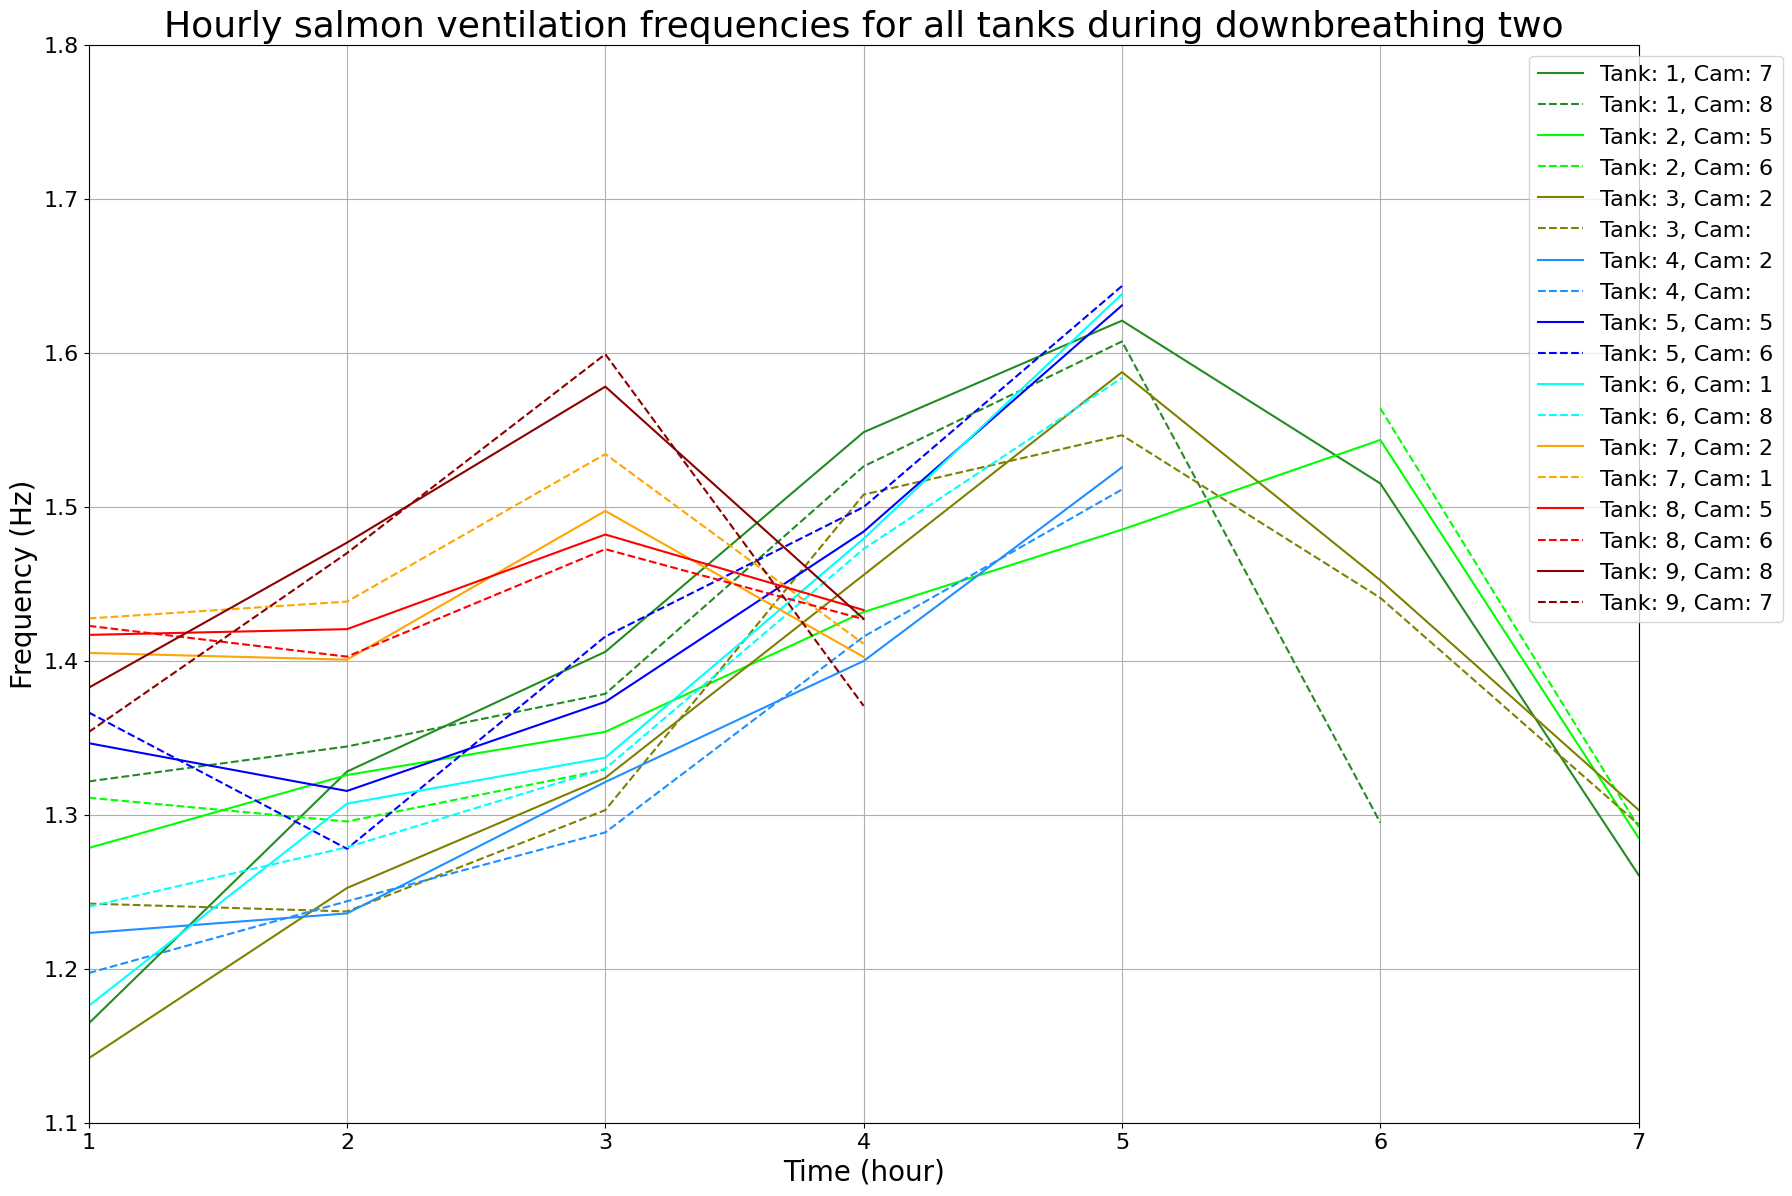

In [ ]:
# Plot downbreathing data from downbreathing two
from  matplotlib.colors import LinearSegmentedColormap
import matplotlib
plt.clf()

def norm_temp(temp, low = 12.3, high = 17.7):
    return (temp - low)*1/(high-low)

def inv_norm_temp(norm, low = 12.3, high = 17.7):
    return low + norm*(high-low)

legokt = []
shapes = ['solid', 'dashed', 'dashdot']
colors_range = []

colors= {   '4': 'dodgerblue',
            '5': 'blue',
            '6': 'cyan',
            '1': 'forestgreen',
            '2': 'lime',
            '3': 'olive',
            '7': 'orange',
            '8': 'red',
            '9': 'darkred'}
tank_in_legokt = dict([(str(x), []) for x in range(1, 10)])

fig, ax = plt.subplots(1,1, figsize=(20, 14))
tanktemp = []
tank_ordered_dict_keys = ['_'.join(l) for l in sorted([l.split('_') for l in list(dict_with_all_dbs.keys())], key=lambda dictkey:dictkey[3][1])]

# beg_vent = {'cold': [], 'medium': [], 'hot': []}
# max_vent_full = {'cold': [], 'medium': [], 'hot': []}
# max_vent_hourly = {'cold': [], 'medium': [], 'hot': []}

for db_name in tank_ordered_dict_keys:
    freq_dict_per_hour = dict_with_all_dbs[db_name]['hourly_freq_evol']
    # Create avg trajectory
    nfish = 7
    nhours = 7
    plot_array = np.zeros([nhours, nfish])

    for hour, i in zip(freq_dict_per_hour.keys(), range(len(freq_dict_per_hour.keys()))):
        for fish_name, j in zip(freq_dict_per_hour[hour], range(len(freq_dict_per_hour[hour]))):
            plot_array[i][j] = np.median(freq_dict_per_hour[hour][fish_name])
    
    avgs = np.nanmean(plot_array, axis = 1)
    tank = int(db_name.split('_')[3][1])
    date = db_name.split('_')[2]
    if len(db_name.split('_')[4]) >=2:
        cam = db_name.split('_')[4][1]
    else:
        cam = ''
    exp_key = date + '_t' + str(tank)
    curr_temp = exp_dat[exp_key][0]
    
    if date.startswith('0'):
        if curr_temp < 13.6:
            beg_vent[13.4].append(avgs[0])
            max_vent_full[13.4].append(dict_with_all_dbs[db_name]['peak_full_freq_evol'])
            max_vent_hourly[13.4].append(dict_with_all_dbs[db_name]['peak_hourly_freq_evol'])
        elif curr_temp < 15.7:
            beg_vent[15.6].append(avgs[0])
            max_vent_full[15.6].append(dict_with_all_dbs[db_name]['peak_full_freq_evol'])
            max_vent_hourly[15.6].append(dict_with_all_dbs[db_name]['peak_hourly_freq_evol'])
        else:
            beg_vent[17.7].append(avgs[0])
            max_vent_full[17.7].append(dict_with_all_dbs[db_name]['peak_full_freq_evol'])
            max_vent_hourly[17.7].append(dict_with_all_dbs[db_name]['peak_hourly_freq_evol'])
            
        if len(tank_in_legokt[str(tank)]) == 0:
            legokt.append('Tank: ' + str(tank) + ', Cam: ' + str(cam))
            ax.plot(np.linspace(1, nhours, num = nhours), avgs, color = colors[str(tank)], linestyle = '-')
            tank_in_legokt[str(tank)].append(cam)
        else:
            legokt.append('Tank: ' + str(tank) + ', Cam: ' + str(cam))
            ax.plot(np.linspace(1, nhours, num = nhours), avgs, color = colors[str(tank)], linestyle = '--')
            tank_in_legokt[str(tank)].append(cam)
ax.legend(legokt[0:], ncol = 1, fontsize = 16, bbox_to_anchor=[1.1, 1],  loc = 'upper right')
ax.set_ylim(1.1,1.8)
ax.set_title('Hourly salmon ventilation frequencies for all tanks during downbreathing two', fontsize = 26)
ax.grid(True)
ax.set_xlim(1, 7)

ax.set_xlabel('Time (hour)', fontsize = 20)
ax.set_ylabel('Frequency (Hz)', fontsize = 20)
ax.tick_params(labelsize=16)

print([(np.nanmean(l), 2*np.nanstd(l, ddof = 1)) for l in list(beg_vent.values())])
print([(np.nanmean(l), 2*np.nanstd(l, ddof = 1)) for l in list(max_vent_hourly.values())])
print([(np.nanmean(l), 2*np.nanstd(l, ddof = 1)) for l in list(max_vent_full.values())])

0.001


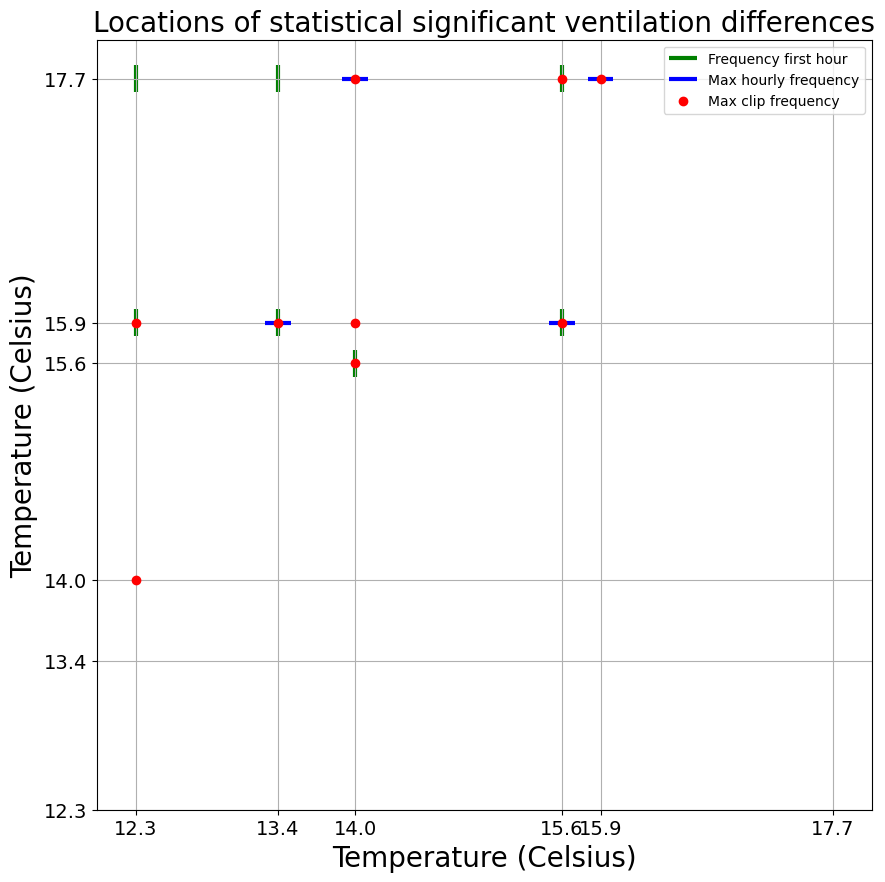

In [ ]:
# Plot the temperatures of statistical significant ventilation differences

first_label = {0: False, 1: False, 2: False}
fig, ax = plt.subplots(1,1, figsize = (10,10))
dicts = [beg_vent, max_vent_hourly, max_vent_full]
for d, i in zip(dicts, range(len(dicts))):
    for key1, j in zip(d.keys(), range(len(list(d.keys())))):
        for key2 in list(d.keys())[j:]:
            t, p =  ttest_ind(d[key1], d[key2], equal_var=False, nan_policy='omit')
            #print(str(key1) + '-' + str(key2) + ', p: ' + str(p))
            if p<0.05:
                if i == 0:
                    if first_label[i]:
                        ax.vlines(key1, ymin = key2-0.1, ymax = key2+0.1, colors='g',linewidth = 3, zorder=1, label="_")
                    else:
                        ax.vlines(key1, ymin = key2-0.1, ymax = key2+0.1, colors='g',linewidth = 3, zorder=1, label="Frequency first hour")
                        first_label[i] = True
                if i == 1:
                    if first_label[i]:
                        ax.hlines(key2, xmin = key1-0.1, xmax = key1+0.1, colors='b',linewidth = 3, zorder=2, label="_")
                    else:
                        ax.hlines(key2, xmin = key1-0.1, xmax = key1+0.1, colors='b',linewidth = 3, zorder=2, label="Max hourly frequency")
                        first_label[i] = True
                if i == 2:
                    if first_label[i]:
                        ax.scatter(key1, key2, c = 'r', zorder=3, label="_")
                    else:
                        ax.scatter(key1, key2, c = 'r', zorder=3, label="Max clip frequency")
                        first_label[i] = True
        
ax.set_xticks(list(dicts[0].keys()))
ax.set_yticks(list(dicts[0].keys()))
ax.grid(True, zorder = 0)
ax.set_title('Locations of statistical significant ventilation differences', fontsize  = 20)
ax.set_xlim(12, 18)
ax.tick_params(labelsize=14)
ax.set_xlabel('Temperature (Celsius)', fontsize = 20)
ax.set_ylabel('Temperature (Celsius)', fontsize = 20)
ax.legend()

t, p =  ttest_ind(max_vent_full[12.3], max_vent_full[15.9],  equal_var=False)
#print(np.average(beg_vent[14]))
print(np.round(p, 3))


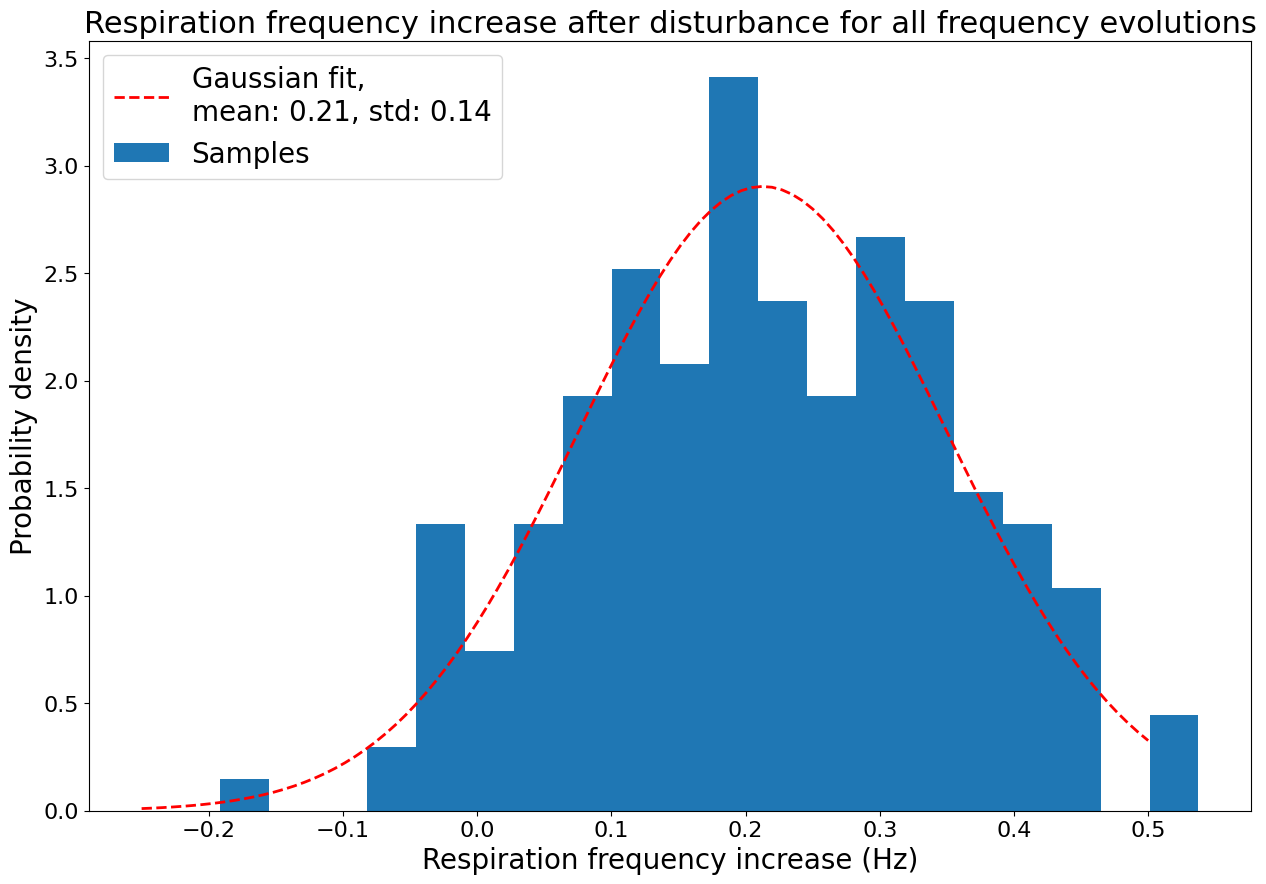

0.13737619112660468
0.21278872155213463
Ttest_1sampResult(statistic=21.010967248668194, pvalue=9.046104785075835e-51)


In [56]:
# Plot ventilation increase after disturbance

plt.subplots(1,1,figsize = (15,10))
bins = np.linspace(-0.25, 0.5, 100)
(mu, sigma) = norm.fit([l for sublist in list(hourly_resp_inc.values()) for l in sublist])
y = norm.pdf(bins, mu, sigma)

plt.plot(bins, y, 'r--', linewidth=2)
plt.hist([l for sublist in list(hourly_resp_inc.values()) for l in sublist], bins=20, density=True)
plt.title('Respiration frequency increase after disturbance for all frequency evolutions', fontsize = 22)
plt.xlabel('Respiration frequency increase (Hz)', fontsize = 20)
plt.ylabel('Probability density', fontsize = 20)
plt.legend(['Gaussian fit,\nmean: ' + str(round(mu, 2)) + ', std: ' + str(round(sigma, 2)), 'Samples'], loc = 'upper left', fontsize = 20)
plt.tick_params(labelsize=16)
plt.show()
print(sigma)
print(mu)

print(ttest_1samp([l for sublist in list(hourly_resp_inc.values()) for l in sublist], 0, alternative = 'two-sided'))


{'9_db2': [array([1, 0, 6, 5, 3, 2, 4], dtype=int64), array([1, 0, 6, 5, 3, 2, 4], dtype=int64)], '9_db1': [array([1, 6, 4, 3, 5, 0, 2], dtype=int64), array([1, 6, 3, 0, 4, 2, 5], dtype=int64)], '7_db2': [array([2, 5, 6, 0, 1, 3, 4], dtype=int64), array([6, 2, 3, 5, 0, 1, 4], dtype=int64)], '7_db1': [array([6, 5, 2, 1, 3, 0, 4], dtype=int64), array([3, 6, 5, 2, 0, 1, 4], dtype=int64)], '8_db1': [array([3, 1, 2, 0, 6, 4, 5], dtype=int64), array([1, 3, 2, 0, 6, 4, 5], dtype=int64)], '8_db2': [array([3, 1, 6, 2, 0, 5, 4], dtype=int64), array([3, 2, 6, 1, 0, 4, 5], dtype=int64)], '1_db2': [array([0, 1, 3, 2, 6, 5, 4], dtype=int64), array([1, 3, 2, 6, 4, 5, 0], dtype=int64)], '1_db1': [array([0, 3, 5, 2, 6, 1, 4], dtype=int64), array([3, 0, 2, 5, 6, 4, 1], dtype=int64)], '2_db1': [array([6, 3, 4, 2, 0, 5, 1], dtype=int64), array([4, 3, 1, 6, 2, 5, 0], dtype=int64)], '2_db2': [array([2, 1, 4, 3, 5, 0, 6], dtype=int64), array([2, 3, 1, 4, 0, 6, 5], dtype=int64)], '3_db2': [array([6, 5, 3, 4, 

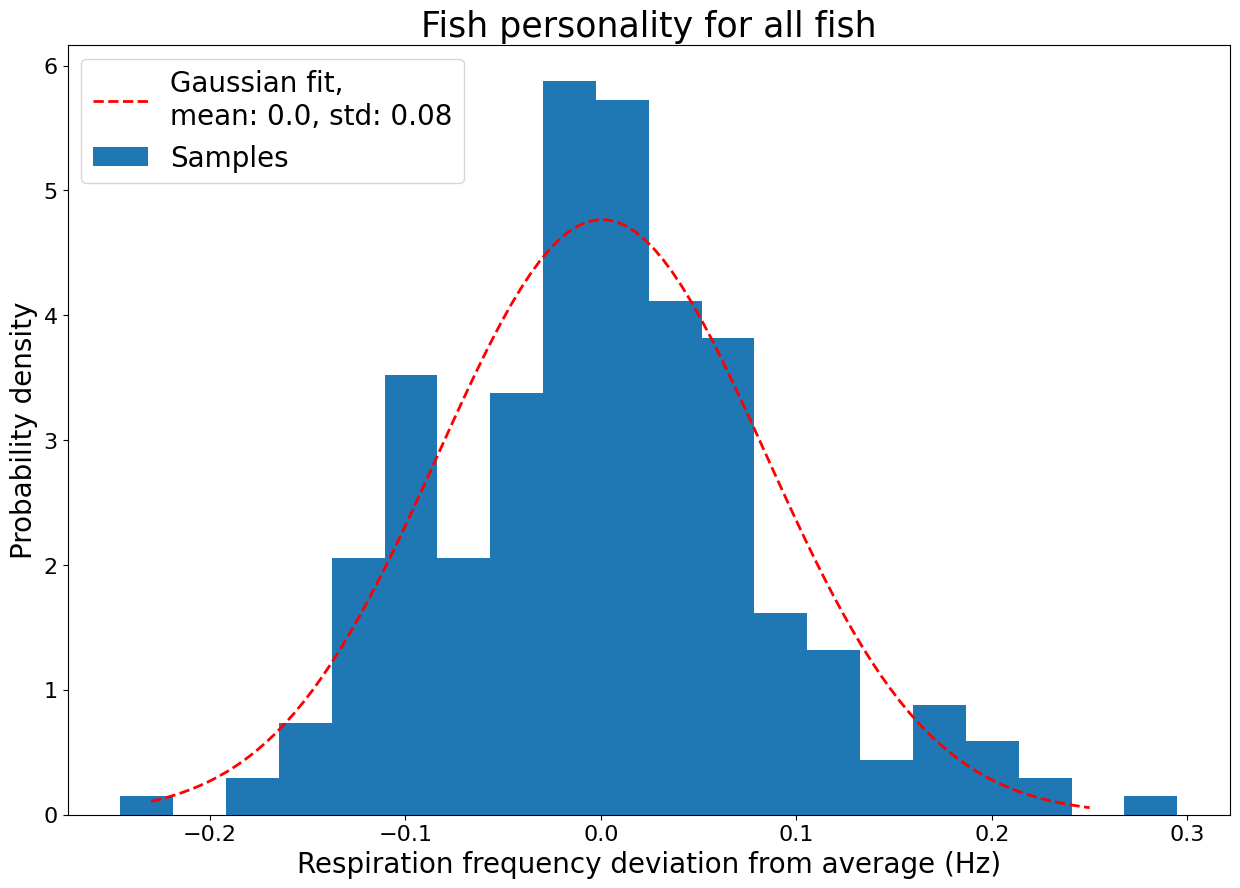

In [ ]:
# Plot fish personality

plt.subplots(1,1,figsize = (15,10))
personality_order_dict = {}


avg_dev_per_fish = []
for db_name in dict_with_all_dbs.keys():
    avg_dev_per_fish = avg_dev_per_fish + dict_with_all_dbs[db_name]['personalities']
    sort = np.argsort(np.array(dict_with_all_dbs[db_name]['personalities']))
    tank = int(db_name.split('_')[3][1])
    date = db_name.split('_')[2]
    if date.startswith('0'):
        key = str(tank) + '_' + 'db2'
    elif date.startswith('2'):
        key = str(tank) + '_' + 'db1'
    
    if key in personality_order_dict:
        personality_order_dict[key].append(sort)
    else:
        personality_order_dict[key] = [sort]

bins = np.linspace(-0.23, 0.25, 100)
(mu, sigma) = norm.fit(avg_dev_per_fish)
y = norm.pdf(bins, mu, sigma)

plt.plot(bins, y, 'r--', linewidth=2)
plt.hist(avg_dev_per_fish, bins=20, density=True)
plt.title('Fish personality for all fish', fontsize = 25)
plt.xlabel('Respiration frequency deviation from average (Hz)', fontsize = 20)
plt.legend(['Gaussian fit,\nmean: ' + str(round(mu, 2)) + ', std: ' + str(round(sigma, 2)), 'Samples'], loc = 'upper left', fontsize = 20)
plt.ylabel('Probability density', fontsize = 20)
plt.tick_params(labelsize=16)
print(personality_order_dict)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000



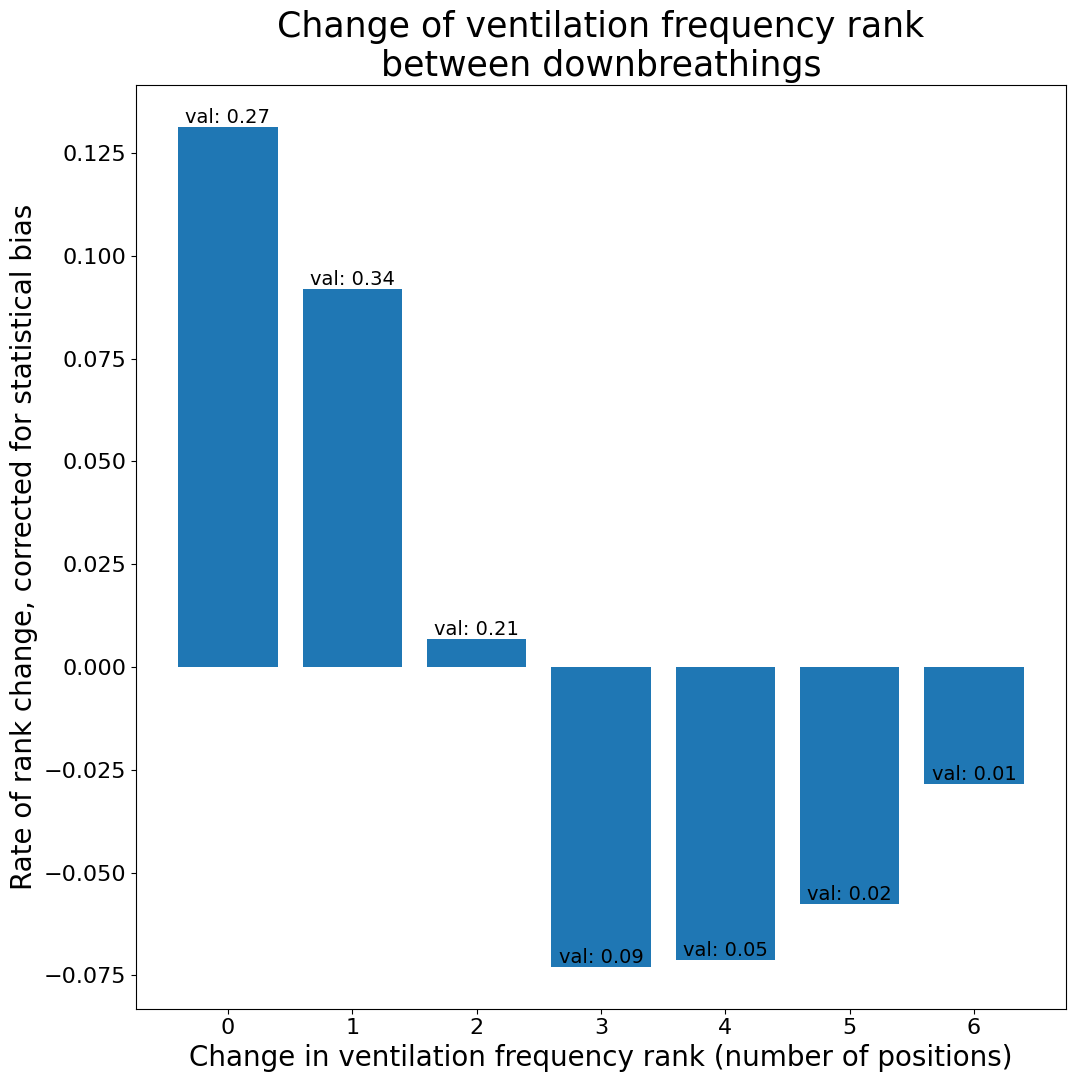

In [ ]:
# Plot fish personality ranking change

def position_change_between_arrays(arr1, arr2):
    return [abs(list(arr1).index(i)-list(arr2).index(i)) for i in range(len(list(arr1)))]

personality_change_across_dbs = []
for i in range(1,10):
    list1 = personality_order_dict[str(i) + '_db1']
    list2 = personality_order_dict[str(i) + '_db2']
    for arr1 in list1:
        for arr2 in list2:
            personality_change_across_dbs.extend(position_change_between_arrays(arr1, arr2))

# Simulate ordering change with random ordering
num_draws = 100000
personality_change_random_ordering = []
for i in range(num_draws):
    arr1 = random.permutation(np.array(range(0,7)))
    arr2 = random.permutation(np.array(range(0,7)))
    personality_change_random_ordering.extend(position_change_between_arrays(arr1, arr2))
    if i%10000==0:
        print(i)

fig, ax = plt.subplots(1,1, figsize = (12,12))
personality_change_above_rand = [personality_change_across_dbs.count(i)/len(personality_change_across_dbs) - personality_change_random_ordering.count(i)/len(personality_change_random_ordering) for i in range(0,7)]
personality_change = [personality_change_across_dbs.count(i)/len(personality_change_across_dbs) for i in range(0,7)]
bar = ax.bar(range(0,7), personality_change_above_rand)
for rect, i in zip(bar, range(len(bar))):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, 'val: ' + str(round(personality_change[i], 2)), ha='center', va='bottom', fontsize = 14)


plt.title('Change of ventilation frequency rank\nbetween downbreathings', fontsize = 25)
plt.xlabel('Change in ventilation frequency rank (number of positions)', fontsize = 20)
plt.ylabel('Rate of rank change, corrected for statistical bias', fontsize = 20)
plt.tick_params(labelsize=16)
print()

In [ ]:
# import matplotlib

# do = []
# temp = []
# vent = []
# dist_inc_cold = []
# dist_inc_med = []
# all_avg_hot = []

# for db_name in dict_with_all_dbs.keys():
#     if 'freq_per_hour' not in dict_with_all_dbs[db_name]:
#         continue
#     freq_dict_per_hour = dict_with_all_dbs[db_name]['freq_per_hour']

#     exp_key = db_name.split('_')[2] + '_' + db_name.split('_')[3]
#     print(dict_with_all_dbs[db_name]['freq_per_hour'])
#     temp.append(exp_dat[exp_key][0])
#     do.append(exp_dat[exp_key][2])
#     vent.append(dict_with_all_dbs[db_name]['freq_per_hour'][0])
#     temp.append(exp_dat[exp_key][0])
#     do.append(exp_dat[exp_key][1])
#     vent.append(max(dict_with_all_dbs[db_name]['freq_per_hour']))

#     if exp_key[-1] <= 3:
#         dist_inc_cold = dist_inc_cold + list(dict_with_all_dbs[db_name]['hand_freq_resp_inc'])
#     elif exp_key.split('_')[0][2:4] == '10':
#         dist_inc_db2 = dist_inc_db2 + list(dict_with_all_dbs[db_name]['hand_freq_resp_inc'])

#     all_avg_dev = all_avg_dev + (list(dict_with_all_dbs[db_name]['avg_dev_by_fish']))

# dist_inc_db1 = [dist_inc_db1[i] for i in range(len(dist_inc_db1)) if math.isnan(dist_inc_db1[i]) == False]
# dist_inc_db2 = [dist_inc_db2[i] for i in range(len(dist_inc_db2)) if math.isnan(dist_inc_db2[i]) == False]
# plt.hist(dist_inc_db1, alpha = 0.5, bins=10, color = 'blue')
# plt.hist(dist_inc_db2, alpha = 0.5, bins=10, color = 'red')
# print(dist_inc_db2)
# plt.axvline(np.average(dist_inc_db2), color = 'red')
# plt.axvline(np.average(dist_inc_db1), color = 'blue')
# plt.show()


In [ ]:
# import matplotlib

# do = []
# temp = []
# vent = []
# dist_inc_cold = []
# dist_inc_med = []
# dist_inc_hot = []
# all_avg_dev = []

# for db_name in dict_with_all_dbs.keys():
#     exp_key = db_name.split('_')[2] + '_' + db_name.split('_')[3]

#     resp_inc = [x for x in list(dict_with_all_dbs[db_name]['handling_frequency_resp_increase'].values()) if type(x) == np.float64]
#     if int(exp_key[-1]) <= 3:
#         dist_inc_med = dist_inc_med + resp_inc
#     elif int(exp_key[-1]) <= 6:
#         dist_inc_cold = dist_inc_cold + resp_inc
#     elif int(exp_key[-1]) <= 9:
#         dist_inc_hot = dist_inc_hot + resp_inc
#     all_avg_dev = all_avg_dev + resp_inc

# dist_inc_cold = [dist_inc_cold[i] for i in range(len(dist_inc_cold)) if math.isnan(dist_inc_cold[i]) == False]
# dist_inc_med = [dist_inc_med[i] for i in range(len(dist_inc_med)) if math.isnan(dist_inc_med[i]) == False]
# dist_inc_hot = [dist_inc_hot[i] for i in range(len(dist_inc_hot)) if math.isnan(dist_inc_hot[i]) == False]
# all_avg_dev = [all_avg_dev[i] for i in range(len(all_avg_dev)) if math.isnan(all_avg_dev[i]) == False]
# plt.hist(dist_inc_cold, alpha = 0.5, bins=15, color = 'blue')
# plt.hist(dist_inc_med, alpha = 0.5, bins=10, color = 'green')
# plt.hist(dist_inc_hot, alpha = 0.5, bins=15, color = 'red')
# plt.axvline(np.average(dist_inc_cold), color = 'blue')
# plt.axvline(np.average(dist_inc_med), color = 'green')
# plt.axvline(np.average(dist_inc_hot), color = 'red')
# plt.show()
